# 데이터 명세

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# 한글 깨짐 방지
import koreanize_matplotlib

#Time Series Analysis
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss, ccf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# clustering
from sklearn.cluster import KMeans

# 스케일링
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 모델링
from sklearn.model_selection import cross_validate
from keras.models import Sequential
from tensorflow import keras
from keras.layers import LSTM
from keras.layers import Dense, Dropout
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA

# 시스템
from tqdm.notebook import tqdm
import os
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

2023-11-09 00:26:48.736667: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-09 00:26:51.041628: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-09 00:26:51.041671: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-09 00:26:51.058139: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-09 00:26:52.998972: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-09 00:26:53.009076: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [2]:
train = pd.read_csv('casting.csv', encoding = 'cp949')

In [3]:
train

,Unnamed: 0,line,name,mold_name,time,date,count,working,emergency_stop,molten_temp,...,lower_mold_temp3,sleeve_temperature,physical_strength,Coolant_temperature,EMS_operation_time,registration_time,passorfail,tryshot_signal,mold_code,heating_furnace
0,0,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:45:06,258,가동,ON,731.0,...,1449.0,550.0,700.0,34.0,23,2019-01-02 16:45:06,0.0,NaN,8722,NaN
1,1,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:45:08,243,가동,ON,720.0,...,NaN,481.0,0.0,30.0,25,2019-01-02 16:45:08,0.0,NaN,8412,B
2,2,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:45:58,244,가동,ON,721.0,...,NaN,481.0,0.0,30.0,25,2019-01-02 16:45:58,0.0,NaN,8412,B
3,3,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:48:03,245,가동,ON,721.0,...,NaN,483.0,0.0,30.0,25,2019-01-02 16:48:03,0.0,NaN,8412,B
4,4,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:50:08,246,가동,ON,721.0,...,NaN,486.0,0.0,30.0,25,2019-01-02 16:50:08,0.0,NaN,8412,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92010,92010,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-03-31,23:51:29,71,가동,ON,731.0,...,1449.0,279.0,726.0,30.0,0,2019-03-31 23:51:29,0.0,NaN,8917,A
92011,92011,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-03-31,23:53:28,72,가동,ON,731.0,...,1449.0,279.0,732.0,30.0,0,2019-03-31 23:53:28,0.0,NaN,8917,A
92012,92012,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-03-31,23:55:44,73,가동,ON,732.0,...,1449.0,272.0,731.0,30.0,0,2019-03-31 23:55:44,0.0,NaN,8917,A
92013,92013,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-03-31,23:57:46,74,가동,ON,732.0,...,1449.0,288.0,723.0,30.0,0,2019-03-31 23:57:46,0.0,NaN,8917,A


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92015 entries, 0 to 92014
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    92015 non-null  int64  
 1   line                          92015 non-null  object 
 2   name                          92015 non-null  object 
 3   mold_name                     92015 non-null  object 
 4   time                          92015 non-null  object 
 5   date                          92015 non-null  object 
 6   count                         92015 non-null  int64  
 7   working                       92014 non-null  object 
 8   emergency_stop                92014 non-null  object 
 9   molten_temp                   89754 non-null  float64
 10  facility_operation_cycleTime  92015 non-null  int64  
 11  production_cycletime          92015 non-null  int64  
 12  low_section_speed             92014 non-null  float64
 13  h

In [5]:
train.drop('Unnamed: 0', axis = 1, inplace = True)

In [6]:
train.columns = ['작업라인', '제품명', '금형명', '수집날짜', '수집일시', '일자별 제품 생산 번호',
                '가동여부', '비상정지', '용탕온도', '설비 작동 사이클시간', '제품생산 사이클 시간',
                 '저속구간속도', '고속구간속도', '용탕량', '주조압력', '비스켓 두께', '상금형온도1',
                '상금형온도2', '상금형온도3', '하금형온도1', '하금형온도2', '하금형온도3', '슬리브온도',
                '형체력', '냉각수 온도', '전자교반 가동시간', '등록일시', '양품불량판정', '사탕신호',
                 '금형코드', '가열로']

In [7]:
train.columns

Index(['작업라인', '제품명', '금형명', '수집날짜', '수집일시', '일자별 제품 생산 번호', '가동여부', '비상정지',
       '용탕온도', '설비 작동 사이클시간', '제품생산 사이클 시간', '저속구간속도', '고속구간속도', '용탕량', '주조압력',
       '비스켓 두께', '상금형온도1', '상금형온도2', '상금형온도3', '하금형온도1', '하금형온도2', '하금형온도3',
       '슬리브온도', '형체력', '냉각수 온도', '전자교반 가동시간', '등록일시', '양품불량판정', '사탕신호', '금형코드',
       '가열로'],
      dtype='object')

In [8]:
train.head()

,작업라인,제품명,금형명,수집날짜,수집일시,일자별 제품 생산 번호,가동여부,비상정지,용탕온도,설비 작동 사이클시간,...,하금형온도3,슬리브온도,형체력,냉각수 온도,전자교반 가동시간,등록일시,양품불량판정,사탕신호,금형코드,가열로
0,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:45:06,258,가동,ON,731.0,119,...,1449.0,550.0,700.0,34.0,23,2019-01-02 16:45:06,0.0,NaN,8722,NaN
1,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:45:08,243,가동,ON,720.0,98,...,NaN,481.0,0.0,30.0,25,2019-01-02 16:45:08,0.0,NaN,8412,B
2,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:45:58,244,가동,ON,721.0,98,...,NaN,481.0,0.0,30.0,25,2019-01-02 16:45:58,0.0,NaN,8412,B
3,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:48:03,245,가동,ON,721.0,100,...,NaN,483.0,0.0,30.0,25,2019-01-02 16:48:03,0.0,NaN,8412,B
4,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:50:08,246,가동,ON,721.0,99,...,NaN,486.0,0.0,30.0,25,2019-01-02 16:50:08,0.0,NaN,8412,B


## 작업라인

In [9]:
# 생산 작업라인을 의미
# 데이터 분석에 큰 의미가 없음

## 제품명

In [10]:
# 생산하고자 하는 제품명
# RH는 고순도 제픔 생산을 의미
# 데이터 분석에 큰의미 없음

## 금형명

In [11]:
# 제품 생산에 사용된 금형의 이름
# 데이터 분석에 큰의미 없음

## 수집날짜

In [12]:
# 제품을 생산하여 수집한 날짜
# 2019-01-02 ~ 2019-03-31
# 양불 판별에 큰 의미가 없음

In [13]:
train['수집날짜'] = pd.to_datetime(train['수집날짜'])

In [14]:
train['수집날짜'].unique()

array(['2019-01-02T00:00:00.000000000', '2019-01-03T00:00:00.000000000',
       '2019-01-04T00:00:00.000000000', '2019-01-05T00:00:00.000000000',
       '2019-01-06T00:00:00.000000000', '2019-01-07T00:00:00.000000000',
       '2019-01-08T00:00:00.000000000', '2019-01-09T00:00:00.000000000',
       '2019-01-10T00:00:00.000000000', '2019-01-11T00:00:00.000000000',
       '2019-01-12T00:00:00.000000000', '2019-01-14T00:00:00.000000000',
       '2019-01-15T00:00:00.000000000', '2019-01-16T00:00:00.000000000',
       '2019-01-17T00:00:00.000000000', '2019-01-18T00:00:00.000000000',
       '2019-01-19T00:00:00.000000000', '2019-01-20T00:00:00.000000000',
       '2019-01-21T00:00:00.000000000', '2019-01-22T00:00:00.000000000',
       '2019-01-23T00:00:00.000000000', '2019-01-24T00:00:00.000000000',
       '2019-01-25T00:00:00.000000000', '2019-01-26T00:00:00.000000000',
       '2019-01-27T00:00:00.000000000', '2019-01-28T00:00:00.000000000',
       '2019-01-29T00:00:00.000000000', '2019-01-30

In [15]:
len(train['수집날짜'].unique())

85

## 수집일시

In [16]:
# 수집한 시간
# 양불 판별에 큰 의미가 없음
# 특정 구간에서 불량이 많이 나왔는지 판단할 때 사용

## 일자별 제품 생산 번호

In [17]:
# 1 ~ 334

In [18]:
print(train['일자별 제품 생산 번호'].min())
print(train['일자별 제품 생산 번호'].max())

1
334


In [19]:
train['일자별 제품 생산 번호'].value_counts(sort = True)

32     334
20     328
2      326
18     325
19     325
      ... 
330      5
331      3
332      3
333      2
334      2
Name: 일자별 제품 생산 번호, Length: 334, dtype: int64

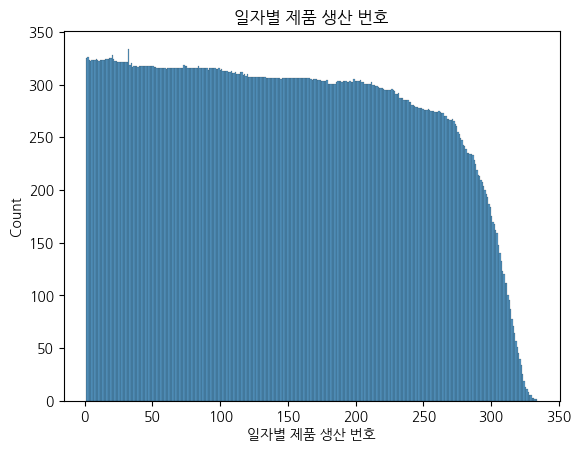

In [20]:
fig, ax = plt.subplots()

ax = sns.histplot(data = train, x = '일자별 제품 생산 번호', bins = 334)
plt.title('일자별 제품 생산 번호')
plt.show()

## 가동여부

In [21]:
# 정지 -> 대부분 불량

In [22]:
train.가동여부.unique()

array(['가동', '정지', nan], dtype=object)

In [23]:
train['가동여부'].value_counts()

가동    91963
정지       51
Name: 가동여부, dtype: int64

In [24]:
train[train['가동여부'] == '정지']

,작업라인,제품명,금형명,수집날짜,수집일시,일자별 제품 생산 번호,가동여부,비상정지,용탕온도,설비 작동 사이클시간,...,하금형온도3,슬리브온도,형체력,냉각수 온도,전자교반 가동시간,등록일시,양품불량판정,사탕신호,금형코드,가열로
7115,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-14,17:28:54,236,정지,ON,712.0,121,...,1449.0,541.0,179.0,31.0,23,2019-01-14 17:28:54,1.0,NaN,8573,B
8140,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-15,17:00:23,155,정지,ON,708.0,119,...,1449.0,479.0,0.0,33.0,23,2019-01-15 17:00:23,1.0,NaN,8412,NaN
14478,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-21,16:11:05,85,정지,ON,714.0,122,...,1449.0,373.0,702.0,28.0,23,2019-01-21 16:11:05,1.0,NaN,8573,A
19318,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-25,18:51:19,275,정지,ON,720.0,121,...,1449.0,136.0,707.0,32.0,23,2019-01-25 18:51:19,1.0,NaN,8722,NaN
23193,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-28,05:52:25,276,정지,ON,714.0,120,...,1449.0,517.0,0.0,34.0,23,2019-01-28 05:52:25,1.0,NaN,8917,B
25103,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-29,07:59:50,1,정지,ON,722.0,118,...,1449.0,460.0,2.0,27.0,23,2019-01-29 07:59:50,1.0,NaN,8722,NaN
35434,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-02-09,20:17:38,2,정지,ON,709.0,118,...,1449.0,356.0,1.0,30.0,3,2019-02-09 20:17:38,1.0,NaN,8917,A
35917,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-02-10,19:52:40,1,정지,ON,731.0,122,...,1449.0,97.0,1.0,17.0,23,2019-02-10 19:52:40,1.0,NaN,8722,NaN
37026,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-02-11,19:58:32,2,정지,ON,731.0,122,...,1449.0,263.0,2.0,26.0,23,2019-02-11 19:58:32,1.0,NaN,8722,NaN
38716,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-02-13,09:42:08,31,정지,ON,728.0,118,...,1449.0,490.0,704.0,32.0,3,2019-02-13 09:42:08,1.0,NaN,8917,A


## 비상정지

In [25]:
# 비상정지는 항시 켜져있음

In [26]:
train['비상정지'].unique()

array(['ON', nan], dtype=object)

In [27]:
train['비상정지'].value_counts()

ON    92014
Name: 비상정지, dtype: int64

## 용탕온도

In [28]:
# 대부분 600도 이상

In [29]:
train['용탕온도'].unique()

array([731., 720., 721., 722., 723., 719., 718., 717., 716., 715., 713.,
       730., 729., 728., 714., 727., 732., 733., 734., 712., 726., 705.,
       707., 708., 724., 709., 725., 688., 735., 699., 668., 650., 711.,
       701., 697., 694., 682., 700., 681., 710., 696., 676., 698., 674.,
       657., 675., 695., 672., 692., 671., 702., 685., 689., 666., 663.,
       706., 667., 653., 640., 634., 677., 656., 703., 673., 660., 651.,
       661., 654., 648., 643., 639., 638., 636., 635., 687., 664., 655.,
       645., 644., 642., 652., 646., 637., 633., 632., 630., 704., 691.,
       647., 629., 626., 690., 641., 669., 649., 658., 662., 684., 679.,
       678., 693., 683., 680., 686., 670.,   0.,  nan,  70.,   7.,  71.,
       659., 665.,  73.,  72.])

In [30]:
train[train['용탕온도'] <= 600]

,작업라인,제품명,금형명,수집날짜,수집일시,일자별 제품 생산 번호,가동여부,비상정지,용탕온도,설비 작동 사이클시간,...,하금형온도3,슬리브온도,형체력,냉각수 온도,전자교반 가동시간,등록일시,양품불량판정,사탕신호,금형코드,가열로
10269,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-17,14:39:15,186,가동,ON,0.0,119,...,1449.0,478.0,706.0,31.0,23,2019-01-17 14:39:15,0.0,NaN,8573,A
10270,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-17,14:39:17,187,가동,ON,0.0,128,...,1449.0,475.0,706.0,32.0,23,2019-01-17 14:39:17,0.0,NaN,8412,NaN
10271,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-17,14:39:44,187,가동,ON,0.0,121,...,1449.0,478.0,692.0,31.0,23,2019-01-17 14:39:44,0.0,NaN,8573,A
10272,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-17,14:40:57,188,가동,ON,0.0,130,...,1449.0,473.0,714.0,32.0,23,2019-01-17 14:40:57,0.0,NaN,8412,NaN
10273,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-17,14:41:48,188,가동,ON,0.0,123,...,1449.0,476.0,707.0,31.0,23,2019-01-17 14:41:48,0.0,NaN,8573,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74559,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-03-12,22:06:07,87,가동,ON,0.0,120,...,1449.0,95.0,659.0,30.0,23,2019-03-12 22:06:07,0.0,NaN,8722,NaN
74562,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-03-12,22:08:10,88,가동,ON,0.0,118,...,1449.0,95.0,652.0,30.0,23,2019-03-12 22:08:10,0.0,NaN,8722,NaN
74565,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-03-12,22:10:06,89,가동,ON,0.0,118,...,1449.0,95.0,647.0,30.0,23,2019-03-12 22:10:06,0.0,NaN,8722,NaN
74569,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-03-12,22:12:37,90,가동,ON,0.0,118,...,1449.0,91.0,654.0,30.0,23,2019-03-12 22:12:37,0.0,NaN,8722,NaN


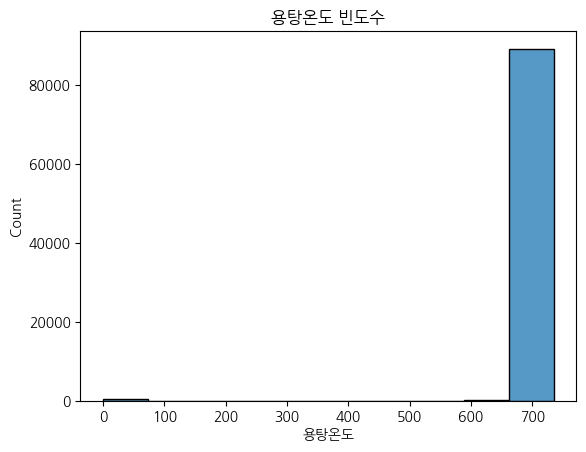

In [31]:
fig, ax = plt.subplots()

ax = sns.histplot(data = train, x = '용탕온도', bins = 10)
plt.title('용탕온도 빈도수')
plt.show()

In [32]:
train[train['용탕온도'] == 0]

,작업라인,제품명,금형명,수집날짜,수집일시,일자별 제품 생산 번호,가동여부,비상정지,용탕온도,설비 작동 사이클시간,...,하금형온도3,슬리브온도,형체력,냉각수 온도,전자교반 가동시간,등록일시,양품불량판정,사탕신호,금형코드,가열로
10269,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-17,14:39:15,186,가동,ON,0.0,119,...,1449.0,478.0,706.0,31.0,23,2019-01-17 14:39:15,0.0,NaN,8573,A
10270,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-17,14:39:17,187,가동,ON,0.0,128,...,1449.0,475.0,706.0,32.0,23,2019-01-17 14:39:17,0.0,NaN,8412,NaN
10271,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-17,14:39:44,187,가동,ON,0.0,121,...,1449.0,478.0,692.0,31.0,23,2019-01-17 14:39:44,0.0,NaN,8573,A
10272,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-17,14:40:57,188,가동,ON,0.0,130,...,1449.0,473.0,714.0,32.0,23,2019-01-17 14:40:57,0.0,NaN,8412,NaN
10273,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-17,14:41:48,188,가동,ON,0.0,123,...,1449.0,476.0,707.0,31.0,23,2019-01-17 14:41:48,0.0,NaN,8573,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74559,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-03-12,22:06:07,87,가동,ON,0.0,120,...,1449.0,95.0,659.0,30.0,23,2019-03-12 22:06:07,0.0,NaN,8722,NaN
74562,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-03-12,22:08:10,88,가동,ON,0.0,118,...,1449.0,95.0,652.0,30.0,23,2019-03-12 22:08:10,0.0,NaN,8722,NaN
74565,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-03-12,22:10:06,89,가동,ON,0.0,118,...,1449.0,95.0,647.0,30.0,23,2019-03-12 22:10:06,0.0,NaN,8722,NaN
74569,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-03-12,22:12:37,90,가동,ON,0.0,118,...,1449.0,91.0,654.0,30.0,23,2019-03-12 22:12:37,0.0,NaN,8722,NaN


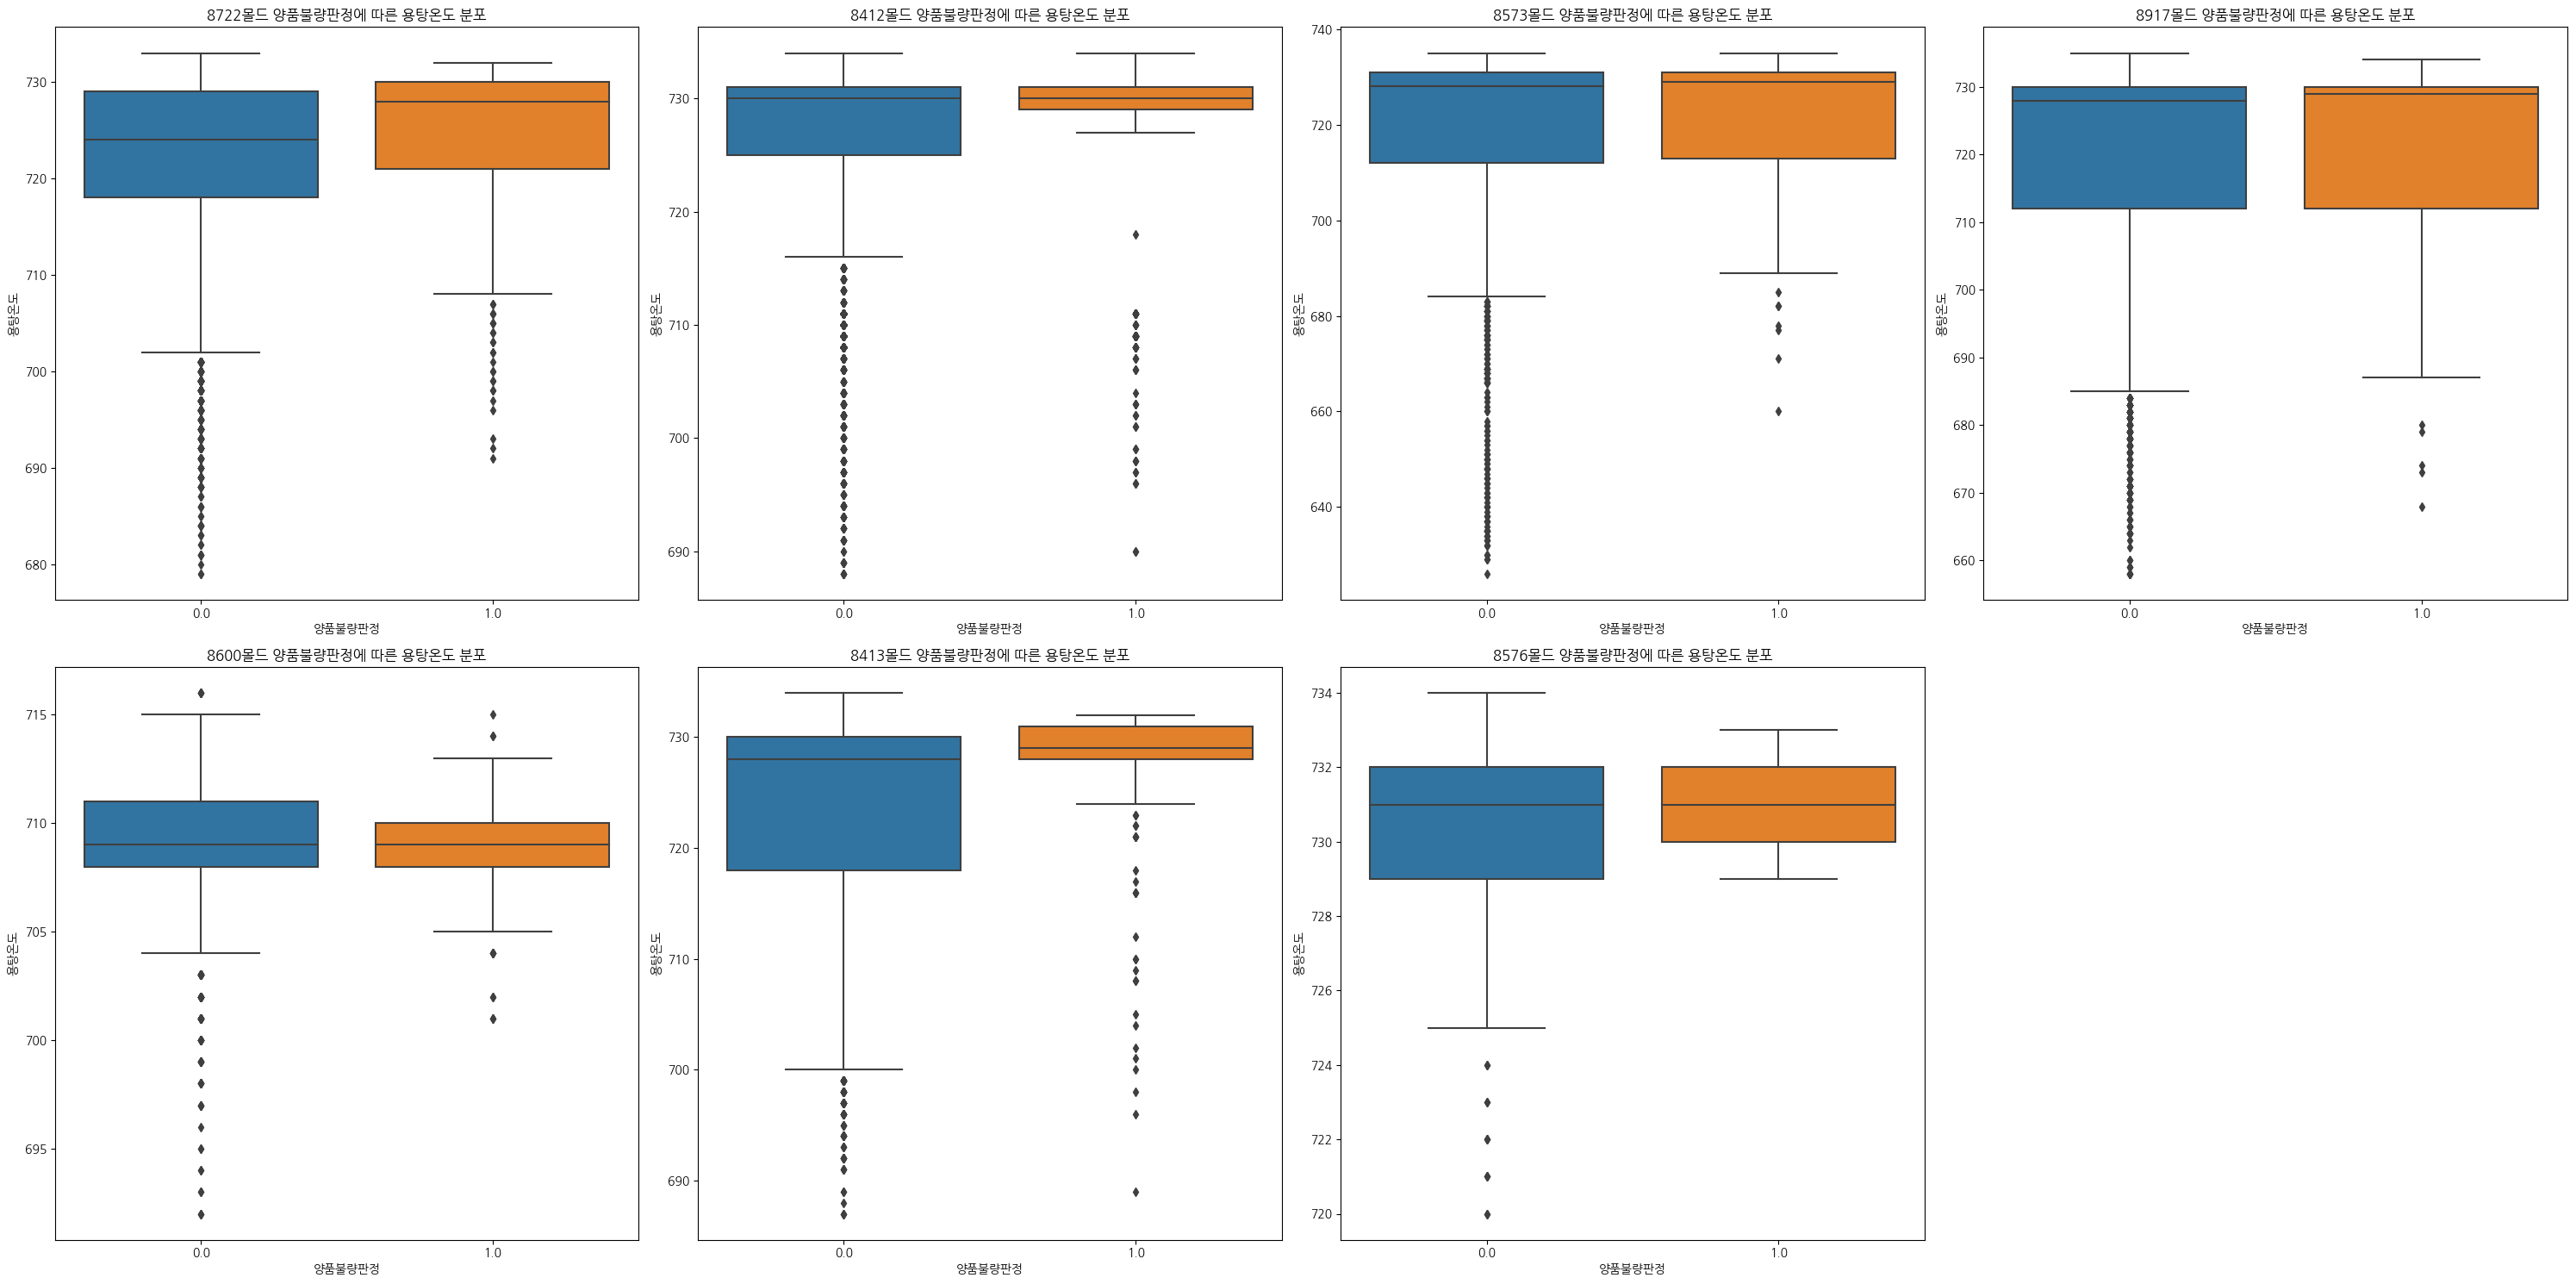

In [33]:
fig = plt.figure(figsize = (30, 15))
j = 1
for i in train['금형코드'].unique():
    ax = fig.add_subplot(2, 4, j)
    ax = sns.boxplot(data = train[(train['금형코드'] == i) & (train['용탕온도'] >= 100)], x='양품불량판정',
                    y='용탕온도')
    # ax.set_ylim(6900, 8900)
    # ax.set_xlim(0, 24)
    j += 1
    ax.set_title(f'{i}몰드 양품불량판정에 따른 용탕온도 분포')

# plt.grid(False)
# plt.title('날짜에 따른 전력사용량')
# plt.xlabel('날짜')
# plt.ylabel('전력사용량(kWh)', rotation = True, labelpad = 20)
fig.tight_layout()
plt.show()

## 설비 작동 사이클시간

In [34]:
train['설비 작동 사이클시간'].unique()

array([119,  98, 100,  99, 104, 101, 102, 120, 153, 121, 122, 124, 146,
       175, 106, 123, 125, 127, 128, 130,  97, 126, 228, 105, 103, 203,
       117, 118, 116, 137, 185, 151, 141, 181, 202, 136, 207, 206,  95,
       225, 148, 131, 213, 252, 139, 164, 209, 115, 132, 134, 147, 205,
       152, 129, 208, 200, 140, 173, 171, 230, 217, 169, 144, 114, 204,
       135, 215, 220, 170, 235, 145, 232, 212, 310, 143, 186, 199, 133,
       168, 201, 221, 138, 216, 149, 167, 150, 226, 157, 174, 162, 178,
       229,  85, 142, 236, 211, 197, 188, 160, 238, 331, 227, 222, 240,
       113, 198, 112, 166,  89, 161,  84,  82, 155, 156, 248, 154,  76,
       218, 224, 109, 180, 111, 172, 176, 179, 242, 163, 214, 195, 210,
       110, 241,  73,  86, 158,  88,  93, 107,  78, 192, 193,  83, 270,
       191, 219,  79,  80,  90,  75,  77, 234, 237, 231, 263, 183, 243,
       189, 159, 108, 184, 296, 177, 196, 165, 187, 190, 278,   0, 259,
       244,  91,  87, 233,  74, 182,  69, 249, 239,  94,  96, 27

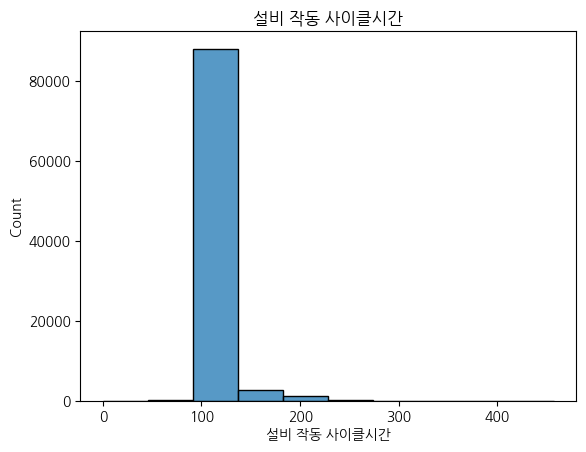

In [35]:
fig, ax = plt.subplots()

ax = sns.histplot(data = train, x = '설비 작동 사이클시간', bins = 10)
plt.title('설비 작동 사이클시간')
plt.show()

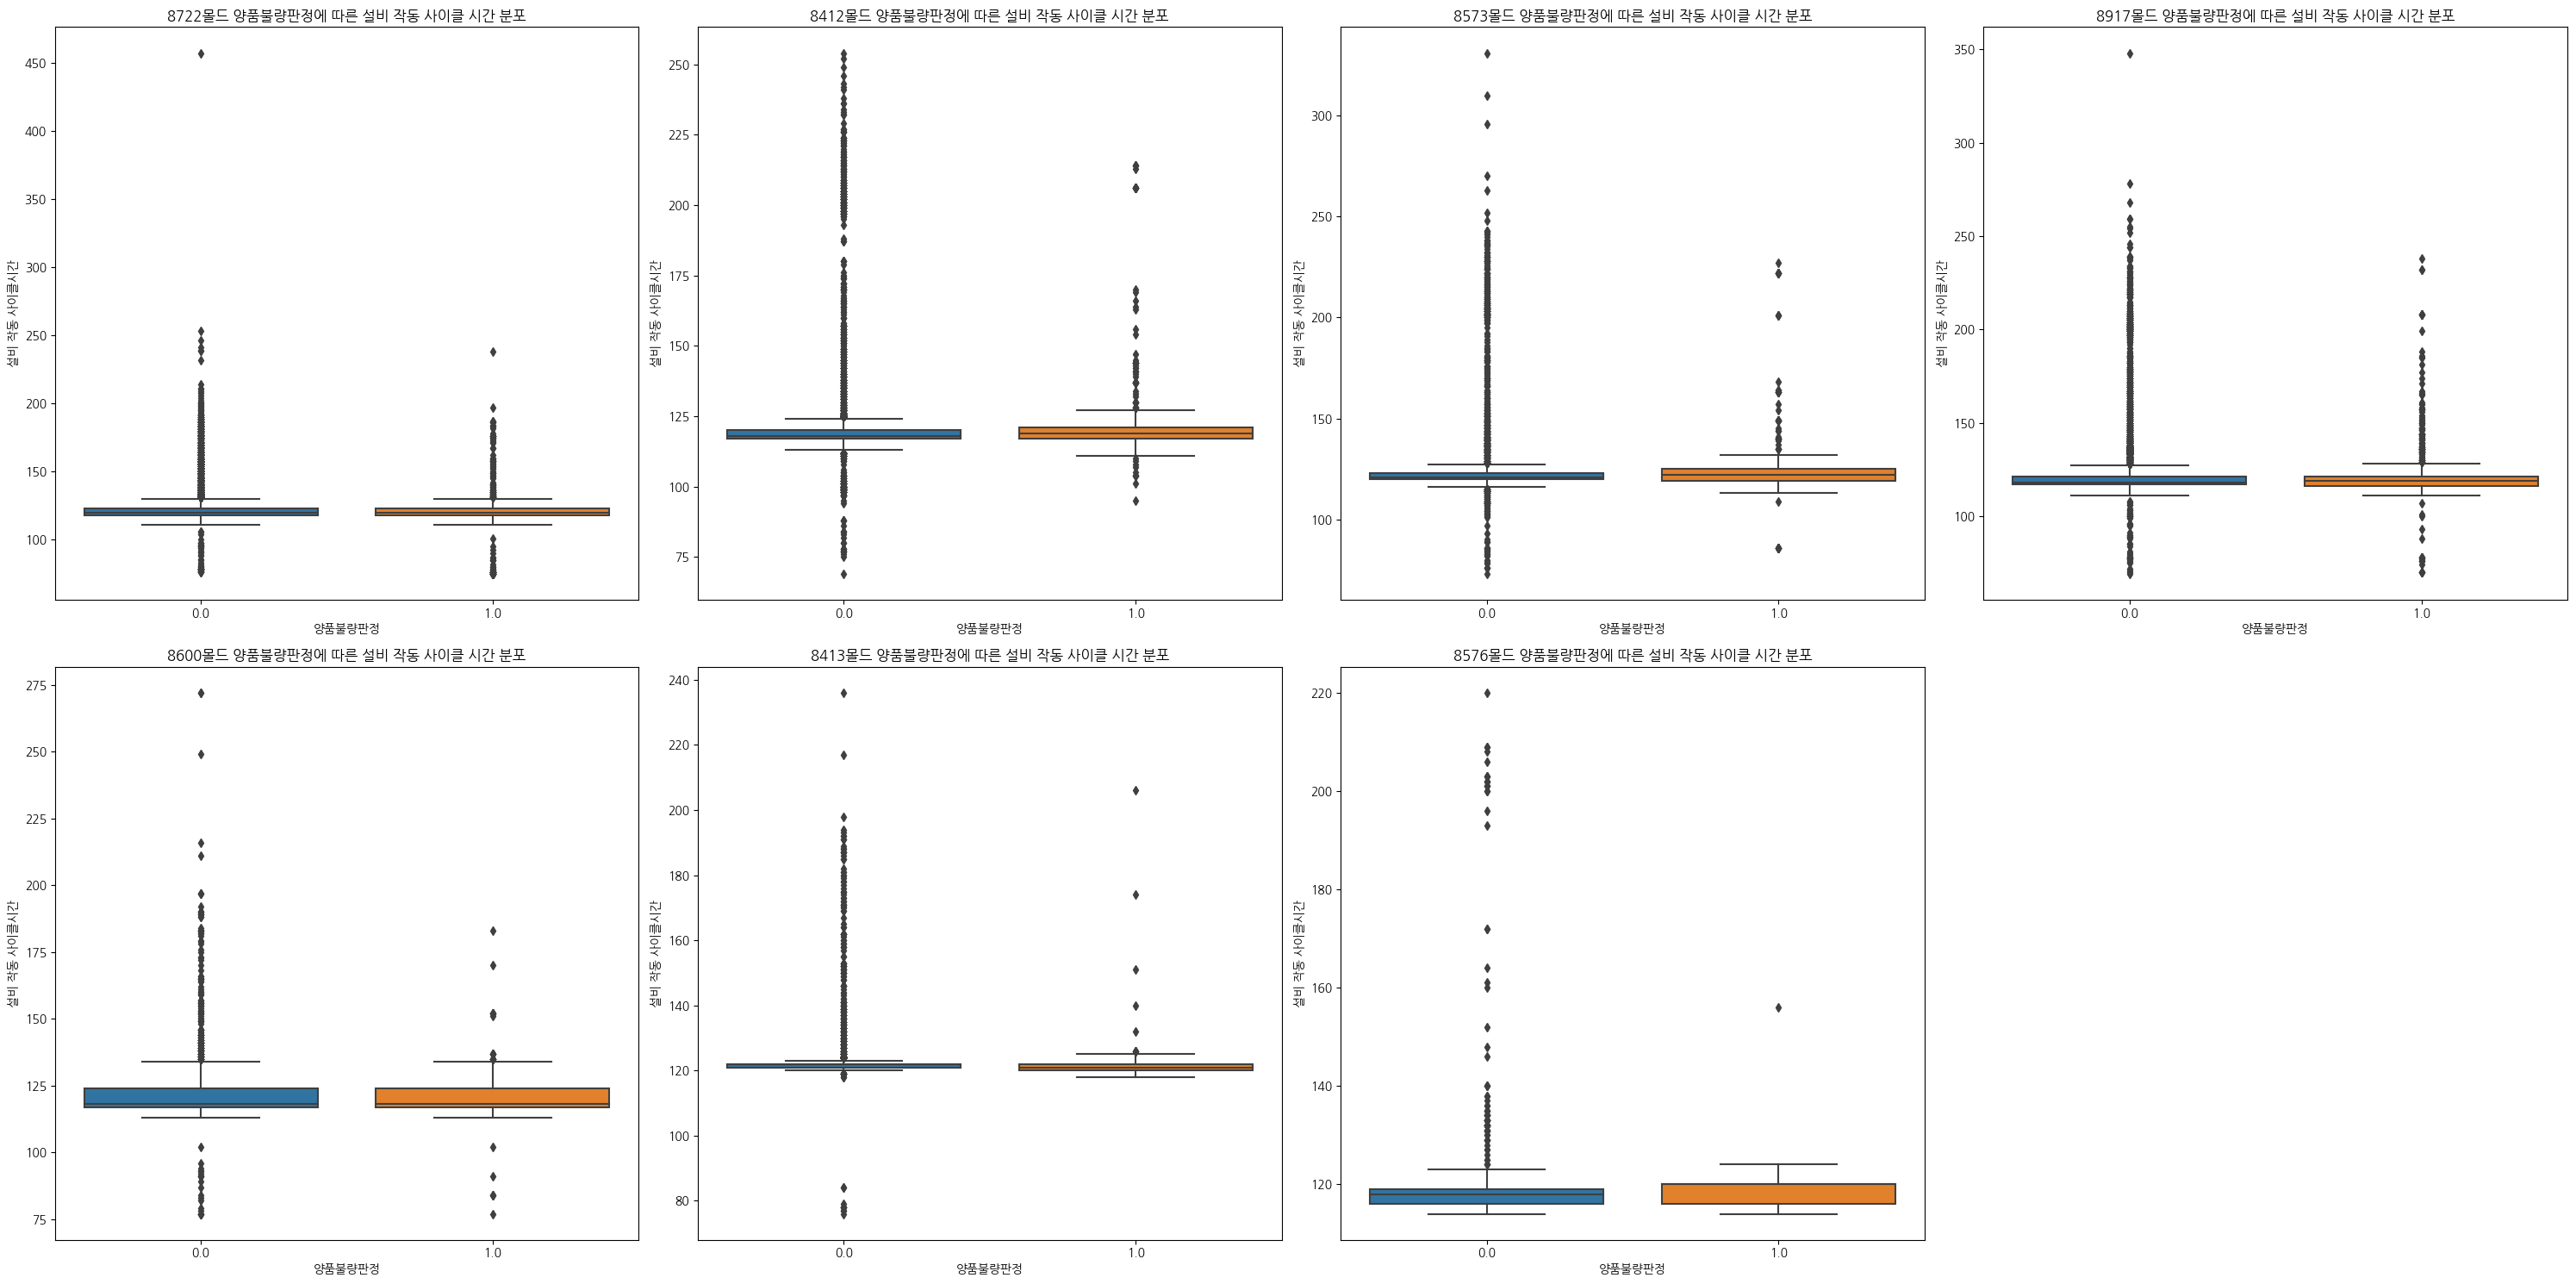

In [36]:
fig = plt.figure(figsize = (30, 15))
j = 1
for i in train['금형코드'].unique():
    ax = fig.add_subplot(2, 4, j)
    ax = sns.boxplot(data = train[train['금형코드'] == i], x='양품불량판정',
                    y='설비 작동 사이클시간')
    # ax.set_ylim(6900, 8900)
    # ax.set_xlim(0, 24)
    j += 1
    ax.set_title(f'{i}몰드 양품불량판정에 따른 설비 작동 사이클 시간 분포')

# plt.grid(False)
# plt.title('날짜에 따른 전력사용량')
# plt.xlabel('날짜')
# plt.ylabel('전력사용량(kWh)', rotation = True, labelpad = 20)
fig.tight_layout()
plt.show()

## 제품생산 사이클 시간

In [37]:
# 제품 1개를 생산하는 시간
# 2분에 1개씩 생산

In [38]:
train['제품생산 사이클 시간'].unique()

array([120, 125, 122, 123, 129, 182, 124, 121, 126, 135, 127, 156, 230,
       119, 128, 149, 151, 131, 130, 217, 154, 118,  82,  84,  87, 196,
       140, 229, 250, 205, 143, 300, 210, 200, 195, 226, 160, 204, 147,
       138, 209, 224, 231, 208, 163, 116, 207, 132, 215, 256, 211, 142,
       139, 137, 157, 206, 117, 201, 172, 134, 219, 153,  79,  80, 223,
       237, 222, 232, 170, 234, 214,  81, 202, 203, 141, 221, 240, 212,
       144, 161, 239, 236, 227, 244, 242,   0, 148, 225, 216, 133,  78,
       166, 136, 158, 159, 145, 253, 235, 220,  95, 246, 164, 233,  85,
        83, 252,  86, 180, 107, 173, 174, 393, 228,  91,  99,  94, 152,
       270, 191, 262, 265, 257, 261, 238, 241,  88, 266, 150, 361, 197,
       243, 259, 362, 363, 485, 254, 146, 375, 248, 245, 213, 298, 482,
       360,  77, 115, 114, 177, 198, 365, 364, 192, 199, 178, 188, 181,
       179, 162, 169, 194, 185, 247, 168, 113, 165, 155,  90, 189, 167,
       175, 186, 193, 176, 278, 183, 100,  92,  96, 190, 187, 18

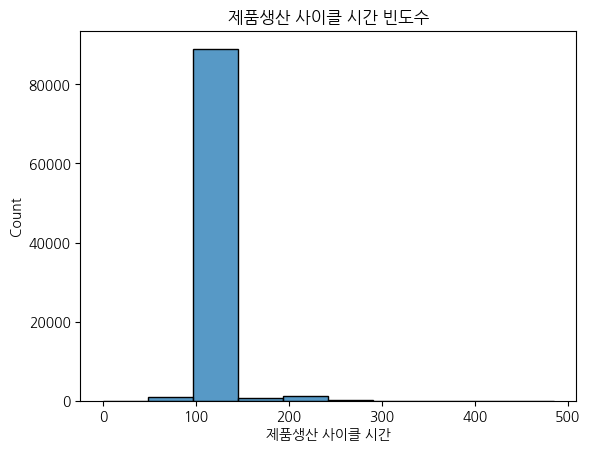

In [39]:
fig, ax = plt.subplots()

ax = sns.histplot(data = train, x = '제품생산 사이클 시간', bins = 10)
plt.title('제품생산 사이클 시간 빈도수')
plt.show()

In [40]:
train.groupby('금형코드')['제품생산 사이클 시간'].mean()

금형코드
8412    123.021238
8413    122.831787
8573    124.664444
8576    121.335435
8600    124.546284
8722    122.549953
8917    121.254114
Name: 제품생산 사이클 시간, dtype: float64

In [41]:
train.groupby('금형코드')['제품생산 사이클 시간'].median()

금형코드
8412    120.0
8413    122.0
8573    123.0
8576    118.0
8600    121.0
8722    122.0
8917    120.0
Name: 제품생산 사이클 시간, dtype: float64

## 저속구간속도

In [42]:
# 저속구간속도가 낮아짐 -> 비스켓 두께 증가

In [43]:
train['저속구간속도'].unique()

array([1.1000e+02, 1.0900e+02, 1.1200e+02, 1.1100e+02, 1.1400e+02,
       1.0800e+02, 1.1300e+02, 1.0600e+02, 1.0700e+02, 5.8000e+01,
       1.0100e+02, 5.1000e+01, 3.0000e+00, 1.0000e+00, 2.0000e+00,
       0.0000e+00, 9.8000e+01, 1.7000e+01, 1.0500e+02, 8.4000e+01,
       5.7000e+01, 1.2000e+01, 9.7000e+01, 9.9000e+01, 8.7000e+01,
       9.2000e+01, 8.8000e+01, 1.0000e+02, 1.0400e+02, 8.0000e+00,
       1.0200e+02, 1.3900e+02, 1.4000e+02, 6.0000e+01, 9.0000e+01,
       2.0000e+01, 1.3800e+02, 1.3700e+02, 8.2000e+01, 1.1500e+02,
       8.9000e+01, 4.0000e+00, 7.1000e+01, 1.3600e+02, 7.9000e+01,
       2.0000e+02, 1.5000e+02, 1.3500e+02, 2.8000e+01, 1.5700e+02,
       1.2100e+02, 1.1000e+01, 2.9000e+01, 5.4000e+01, 2.2000e+01,
       4.7000e+01, 5.0000e+00, 1.0000e+01, 6.3000e+01, 7.0000e+00,
       6.9000e+01, 2.6000e+01, 9.5000e+01, 6.2000e+01,        nan,
       7.5000e+01, 8.6000e+01, 6.1000e+01, 6.6000e+01, 1.3000e+01,
       7.0000e+01, 4.2000e+01, 3.9000e+01, 1.0300e+02, 9.6000e

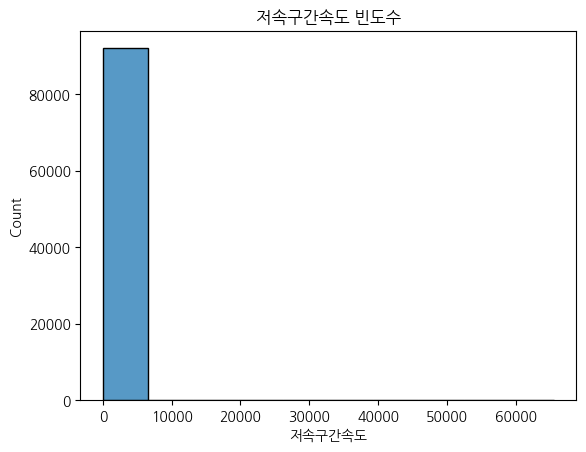

In [44]:
fig, ax = plt.subplots()

ax = sns.histplot(data = train, x = '저속구간속도', bins = 10)
plt.title('저속구간속도 빈도수')
plt.show()

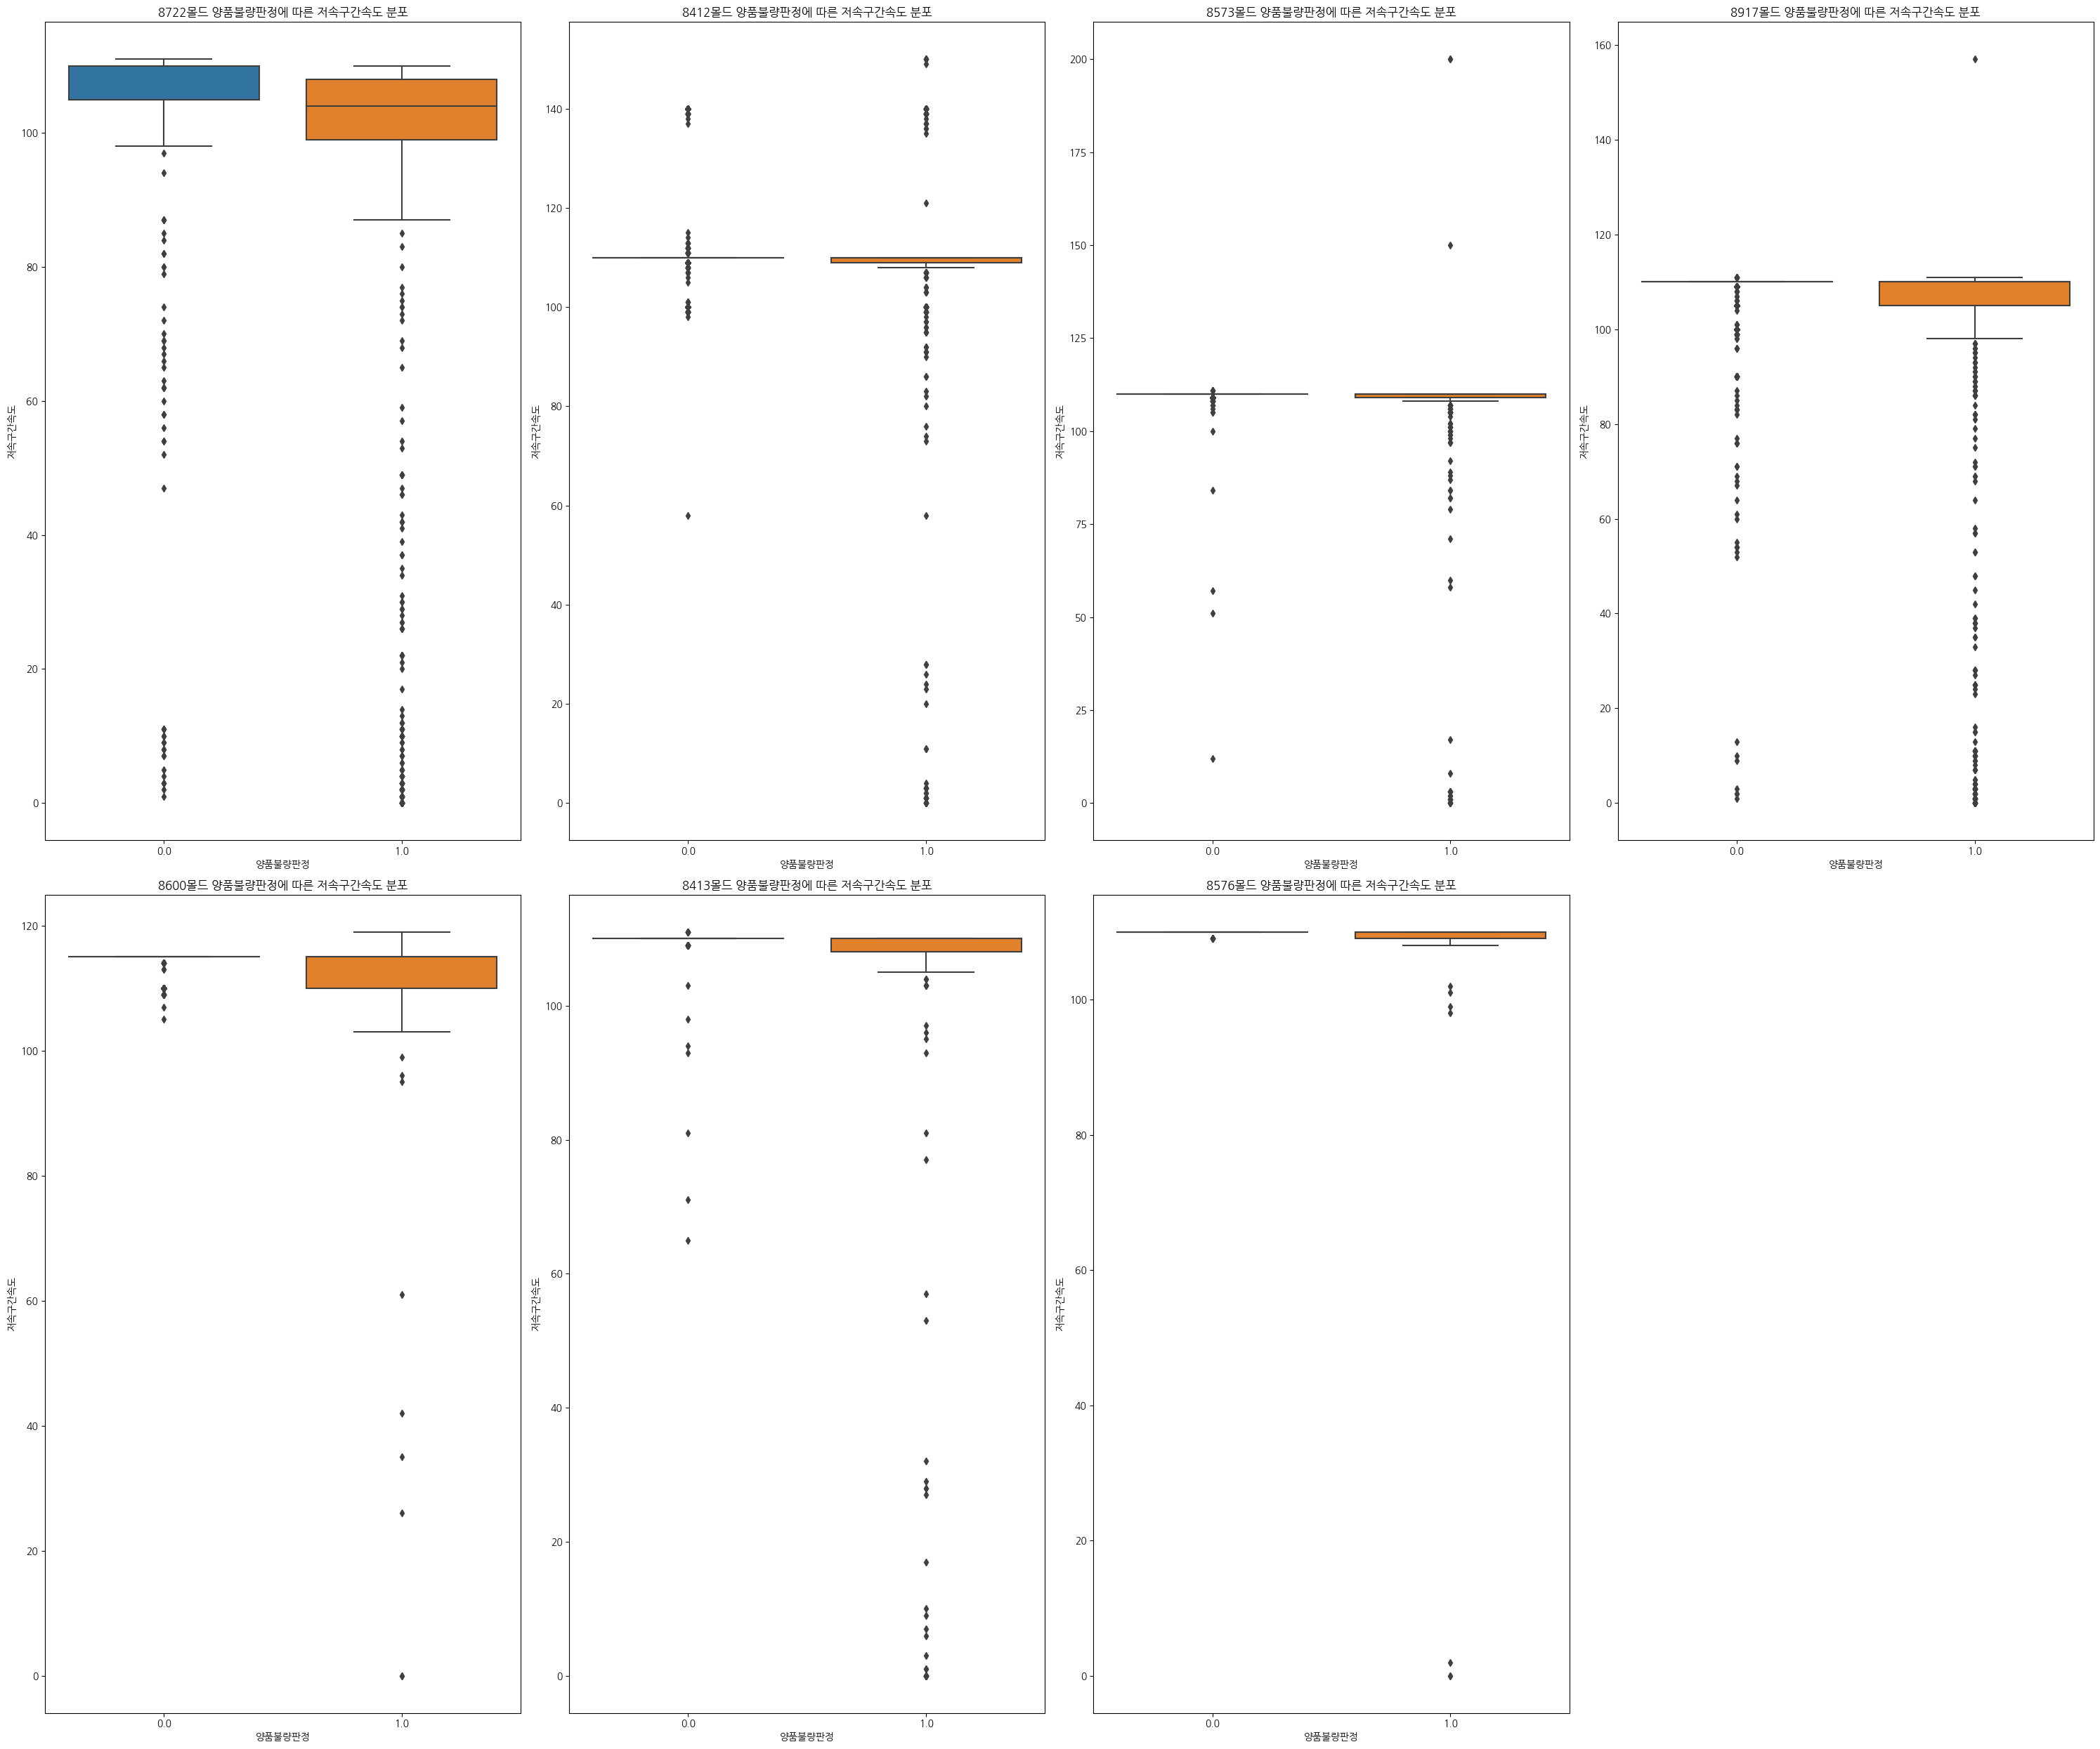

In [45]:
fig = plt.figure(figsize = (30, 25))
j = 1
for i in train['금형코드'].unique():
    ax = fig.add_subplot(2, 4, j)
    ax = sns.boxplot(data = train[(train['금형코드'] == i) & (train['저속구간속도'] <= 60000)], x='양품불량판정',
                    y='저속구간속도')
    # ax.set_ylim(6900, 8900)
    # ax.set_xlim(0, 24)
    j += 1
    ax.set_title(f'{i}몰드 양품불량판정에 따른 저속구간속도 분포')

# plt.grid(False)
# plt.title('날짜에 따른 전력사용량')
# plt.xlabel('날짜')
# plt.ylabel('전력사용량(kWh)', rotation = True, labelpad = 20)
fig.tight_layout()
plt.show()

## 고속구간속도

In [46]:
train['고속구간속도'].unique()

array([112., 109., 110., 111., 108., 107., 125., 113., 114., 106., 120.,
        97.,  98., 116., 320., 115., 118., 121., 117., 345., 160., 340.,
       123., 322., 124., 119., 149., 168., 139., 170., 239., 285., 158.,
       195., 167., 128., 142., 134., 135., 173., 181., 131., 193., 147.,
       150., 179., 122., 140., 126., 136., 133., 146., 144., 155., 141.,
       129., 216., 200., 127., 132., 148., 210., 270., 154., 312., 301.,
       156., 184., 204., 203., 157., 243., 162., 143., 145., 182., 186.,
         5., 159.,   0., 220., 262., 232., 153., 171., 178., 163., 166.,
       152., 258., 176., 183., 174., 241., 219., 194., 213., 190., 223.,
       225., 199., 211., 208.,   4.,  nan,   9., 307., 165., 172., 151.,
       224., 217., 137., 164., 240., 233., 271., 209., 180., 214., 230.,
       245., 191., 161., 205., 202., 344., 138., 212., 274., 244., 272.,
       215., 201., 235., 226., 315., 297., 309., 242., 169., 196., 251.,
       188., 234., 253., 130., 255., 231., 102., 35

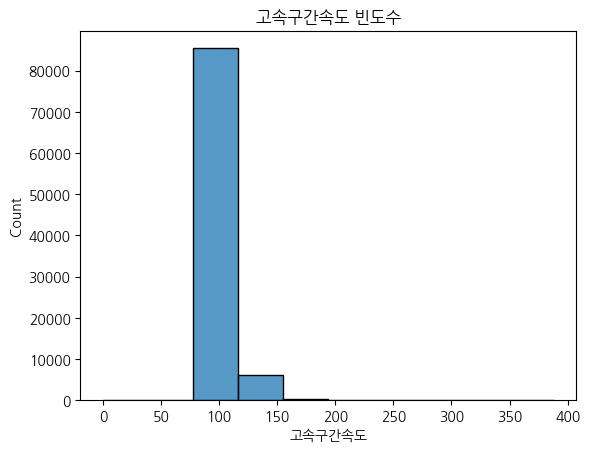

In [47]:
fig, ax = plt.subplots()

ax = sns.histplot(data = train, x = '고속구간속도', bins = 10)
plt.title('고속구간속도 빈도수')
plt.show()

## 용탕량

In [48]:
train['용탕량'].unique()

array([7.500e+01,       nan, 7.400e+01, 7.200e+01, 7.100e+01, 7.000e+01,
       6.900e+01, 6.700e+01, 6.600e+01, 6.500e+01, 6.400e+01, 6.300e+01,
       6.100e+01, 6.000e+01, 5.900e+01, 5.800e+01, 5.700e+01, 5.500e+01,
       5.300e+01, 5.200e+01, 5.100e+01, 5.000e+01, 4.800e+01, 4.900e+01,
       4.700e+01, 4.600e+01, 2.767e+03, 9.600e+01, 3.000e+01, 2.800e+01,
       2.700e+01, 2.500e+01, 9.700e+01, 9.900e+01, 9.500e+01, 9.400e+01,
       9.300e+01, 9.200e+01, 9.100e+01, 9.000e+01, 8.900e+01, 8.800e+01,
       8.700e+01, 8.600e+01, 8.500e+01, 8.400e+01, 8.100e+01, 8.000e+01,
       7.900e+01, 7.800e+01, 7.700e+01, 7.600e+01, 6.800e+01, 5.600e+01,
       5.400e+01, 4.500e+01, 4.400e+01, 4.300e+01, 4.200e+01, 4.100e+01,
       4.000e+01, 3.800e+01, 3.600e+01, 3.500e+01, 3.400e+01, 3.300e+01,
       3.200e+01, 3.100e+01, 2.900e+01, 9.800e+01, 8.300e+01, 8.200e+01,
       7.300e+01, 6.200e+01, 3.900e+01, 3.700e+01, 2.600e+01, 2.400e+01,
       1.000e+02, 1.010e+02, 2.300e+01, 2.200e+01, 

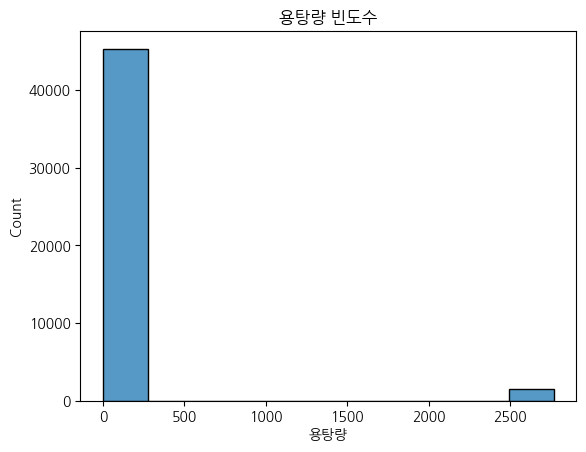

In [49]:
fig, ax = plt.subplots()

ax = sns.histplot(data = train, x = '용탕량', bins = 10)
plt.title('용탕량 빈도수')
plt.show()

In [50]:
train.groupby('금형코드')['용탕량'].mean()

금형코드
8412    1065.839479
8413      69.870235
8573            NaN
8576            NaN
8600      66.772635
8722      65.303955
8917      66.850800
Name: 용탕량, dtype: float64

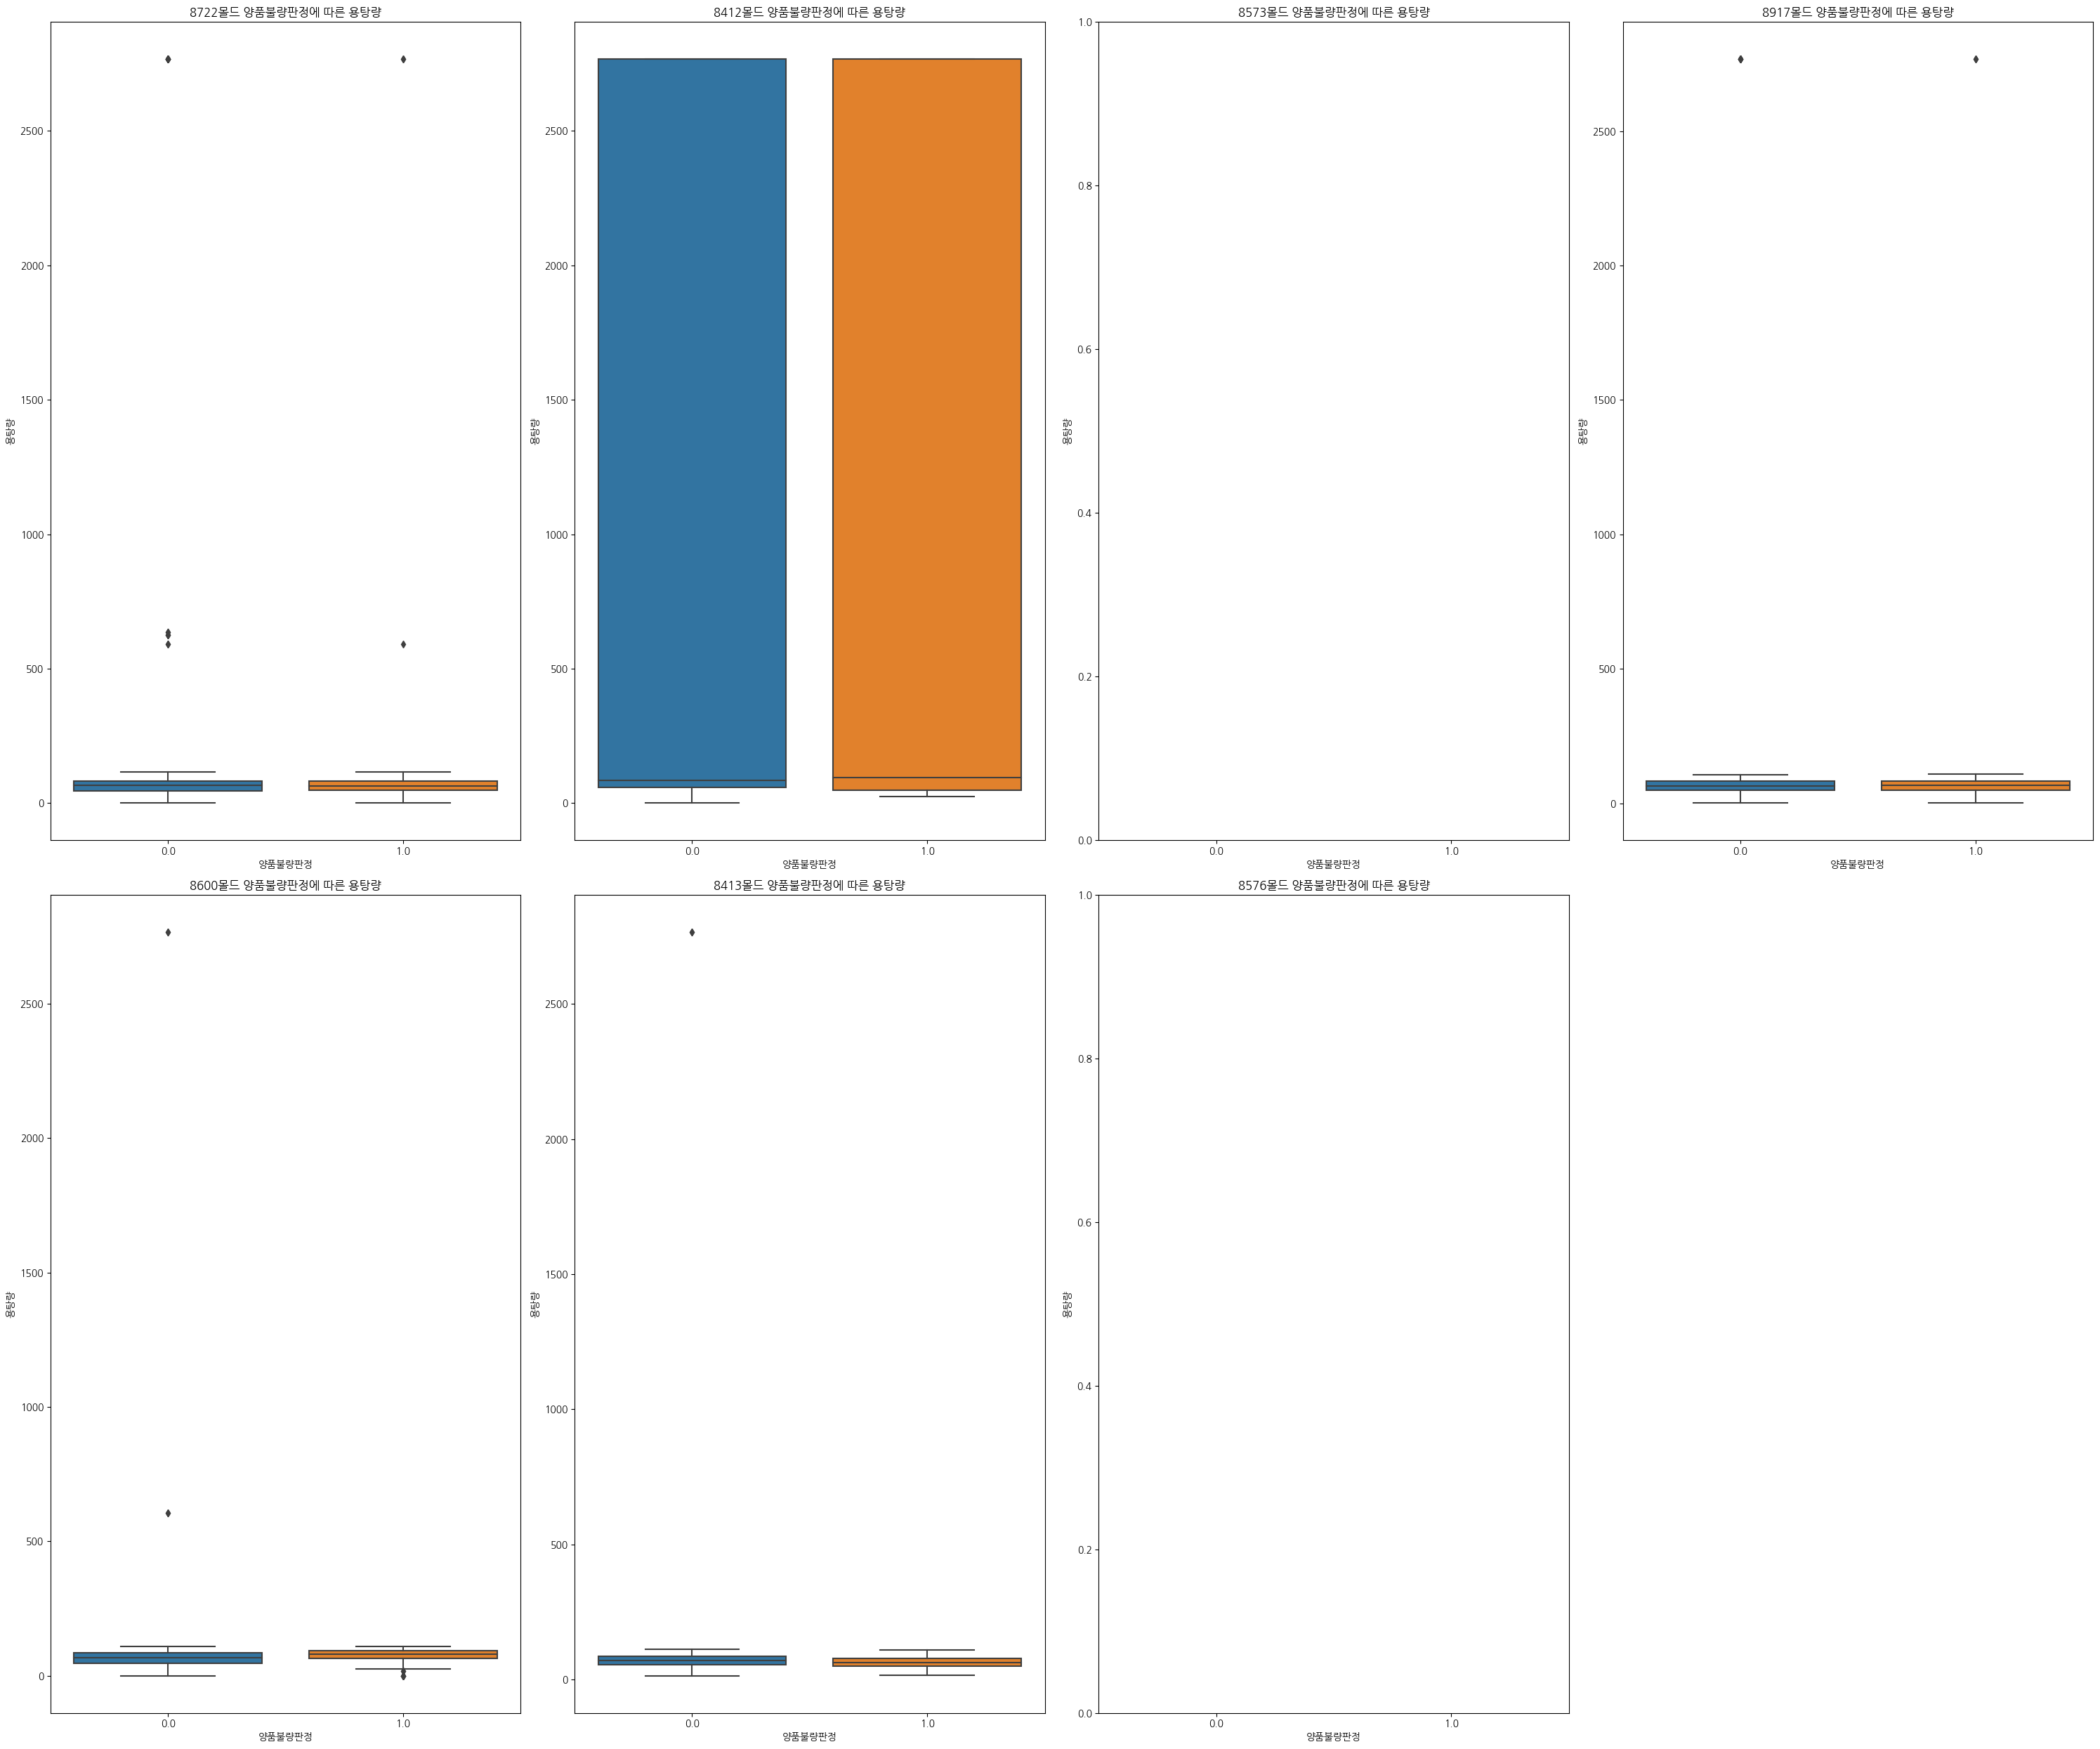

In [51]:
fig = plt.figure(figsize = (30, 25))
j = 1
for i in train['금형코드'].unique():
    ax = fig.add_subplot(2, 4, j)
    ax = sns.boxplot(data = train[train['금형코드'] == i], x='양품불량판정',
                    y='용탕량')
    # ax.set_ylim(6900, 8900)
    # ax.set_xlim(0, 24)
    j += 1
    ax.set_title(f'{i}몰드 양품불량판정에 따른 용탕량')

# plt.grid(False)
# plt.title('날짜에 따른 전력사용량')
# plt.xlabel('날짜')
# plt.ylabel('전력사용량(kWh)', rotation = True, labelpad = 20)
fig.tight_layout()
plt.show()

In [52]:
train.groupby('금형코드')['용탕량'].value_counts()

금형코드  용탕량   
8412  2767.0    1537
      84.0        55
      93.0        51
      59.0        48
      61.0        48
                ... 
8917  6.0          2
      2.0          1
      3.0          1
      108.0        1
      110.0        1
Name: 용탕량, Length: 527, dtype: int64

## 주조압력

In [53]:
# 공정 시 압력
# 압력이 낮아지면 -> 비스켓 두께 상승

In [54]:
train['주조압력'].unique()

array([331., 309., 308., 310., 307., 177., 176., 313., 316., 299., 301.,
       314., 300., 311., 304., 330., 306., 152., 158., 185., 191., 189.,
       312., 332., 333., 336., 150., 160., 159., 156., 162., 149., 146.,
       153., 144., 186., 161., 173., 315., 334., 170., 163., 178., 169.,
       326., 157., 323., 143., 168., 175., 164., 338., 179., 335., 322.,
       174., 324., 172., 171., 329., 328., 327., 325., 141., 155., 139.,
       154., 165., 167., 183., 140., 181., 151., 128., 193., 188., 182.,
       166., 184., 180., 145., 303., 321., 319., 320.,  45., 147., 148.,
       318., 317., 200., 302., 340., 137., 337., 192., 198., 142.,  nan,
       195., 305.,  41., 187., 129., 196., 138., 190., 194., 199., 203.,
       342., 339., 278., 341., 344., 260., 265., 343., 283., 345.,  62.,
       348., 346., 241., 347.])

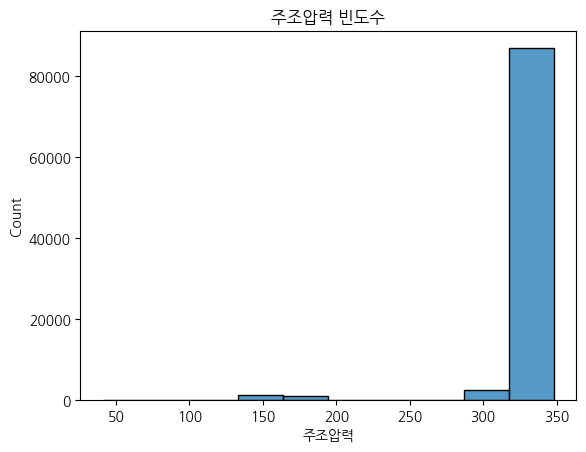

In [55]:
fig, ax = plt.subplots()

ax = sns.histplot(data = train, x = '주조압력', bins = 10)
plt.title('주조압력 빈도수')
plt.show()

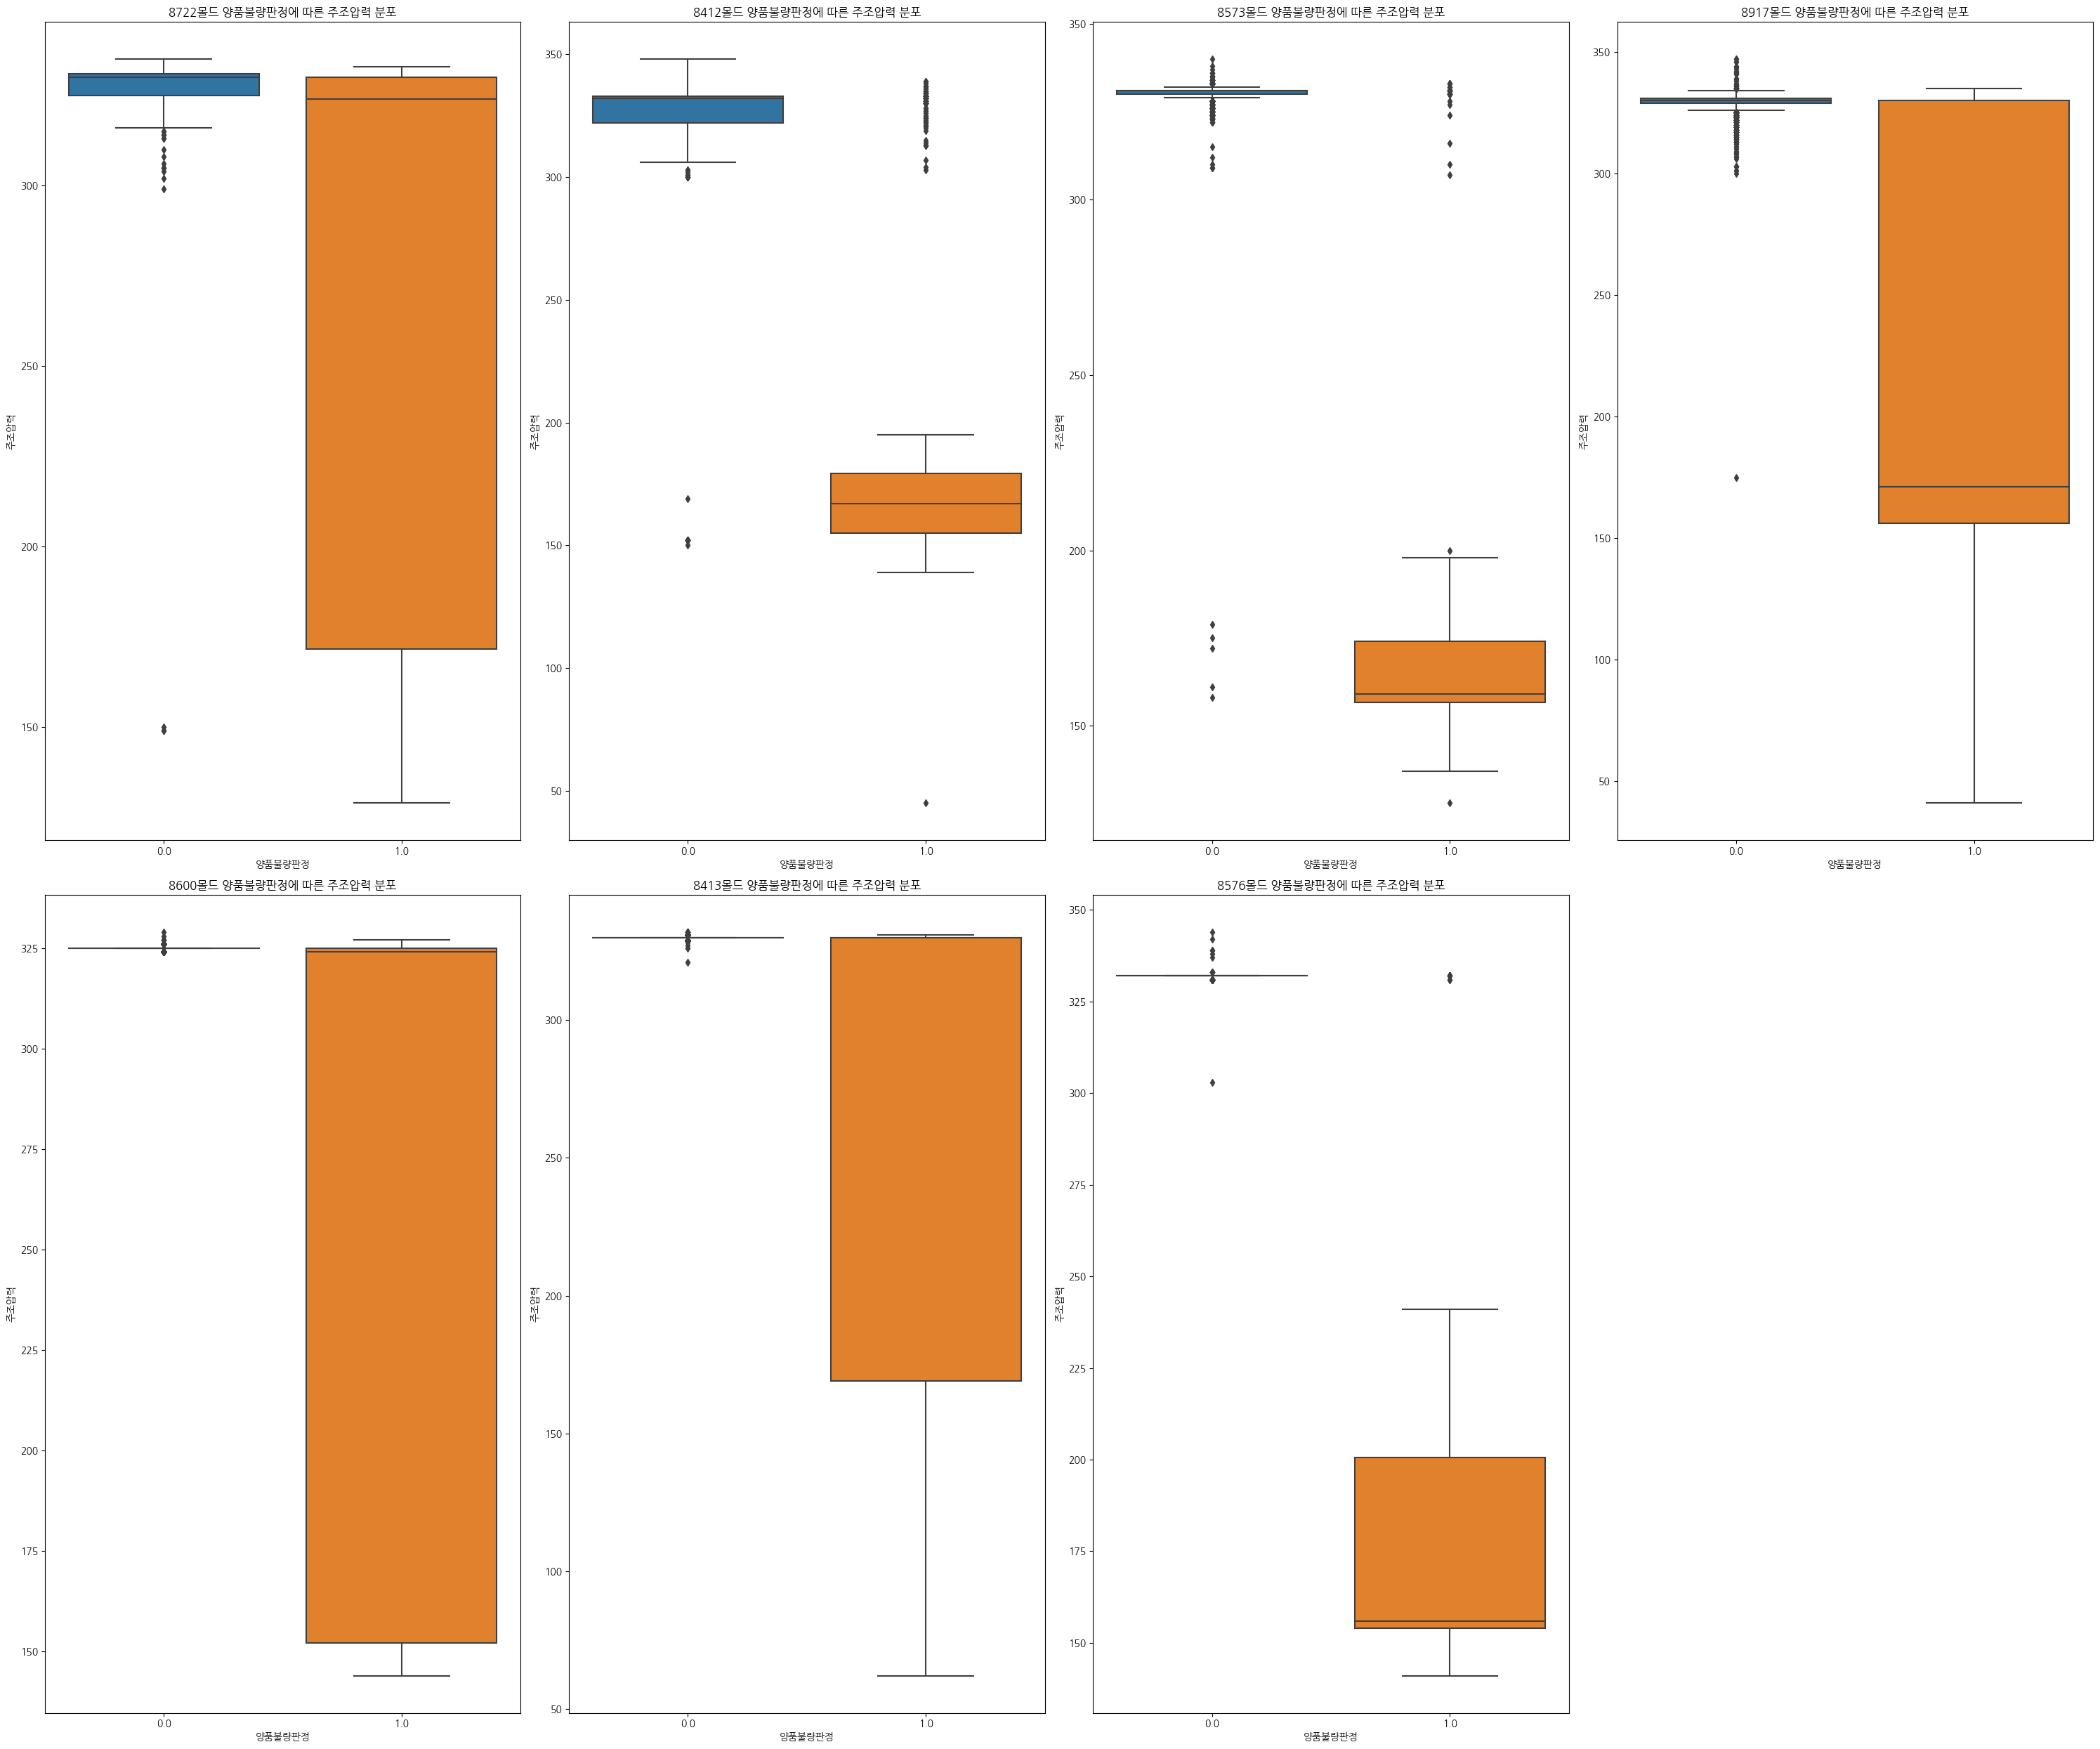

In [56]:
fig = plt.figure(figsize = (30, 25))
j = 1
for i in train['금형코드'].unique():
    ax = fig.add_subplot(2, 4, j)
    ax = sns.boxplot(data = train[train['금형코드'] == i], x='양품불량판정',
                    y='주조압력')
    # ax.set_ylim(6900, 8900)
    # ax.set_xlim(0, 24)
    j += 1
    ax.set_title(f'{i}몰드 양품불량판정에 따른 주조압력 분포')

# plt.grid(False)
# plt.title('날짜에 따른 전력사용량')
# plt.xlabel('날짜')
# plt.ylabel('전력사용량(kWh)', rotation = True, labelpad = 20)
fig.tight_layout()
plt.show()

## 비스켓 두께

In [57]:
# 비스켓의 두께
# 주조압력, 저속구간속도가 낮아지면 -> 비스켓 두께 증가


In [58]:
train['비스켓 두께'].unique()

array([ 35.,  48.,  49.,  50.,  51.,  47.,  45.,  46.,  44.,  52.,  41.,
        53.,  56.,  57.,  55.,  54.,  43.,  42.,  40.,  19., 422.,  36.,
        17.,  39.,   8.,   6.,  32.,  38., 420.,  37.,  34.,  30.,  31.,
        23.,   7.,  20.,  25.,  11.,  33.,   9.,  58.,  13.,  62.,  59.,
        27.,  10.,  nan,  28.,  21.,  29.,   5.,  74.,   4.,  88.,  66.,
        65.,  61.,  24.,   1.,  16.,  22.,   2.,  15.,  60.,   3.,  26.,
        67.,   0.])

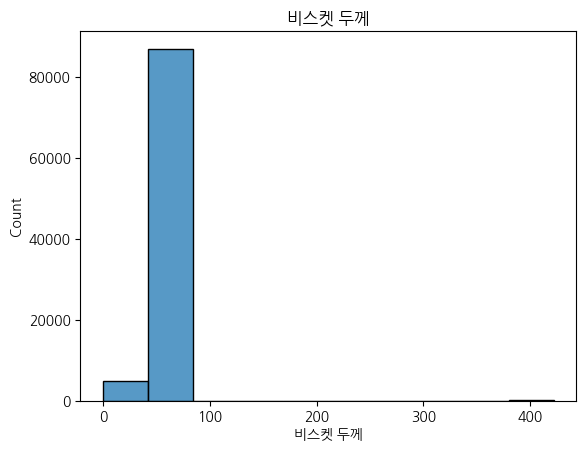

In [59]:
fig, ax = plt.subplots()

ax = sns.histplot(data = train, x = '비스켓 두께', bins = 10)
plt.title('비스켓 두께')
plt.show()

In [60]:
train.groupby('금형코드')['비스켓 두께'].mean()

금형코드
8412    51.523823
8413    48.225224
8573    53.597020
8576    51.976040
8600    47.623311
8722    48.393356
8917    51.365325
Name: 비스켓 두께, dtype: float64

In [61]:
train.groupby(['금형코드', '비스켓 두께']).mean()

일자별 제품 생산 번호        용탕온도  설비 작동 사이클시간  제품생산 사이클 시간      저속구간속도  \
금형코드 비스켓 두께                                                                   
8412 1.0        30.000000  732.000000   122.000000   120.000000  110.000000   
     4.0       143.000000  731.000000   120.000000   123.000000  110.000000   
     6.0        77.000000  708.000000   121.000000   123.000000  110.000000   
     8.0       245.000000  729.500000   120.000000   121.500000  109.000000   
     10.0       20.000000  729.000000   121.000000   119.000000  110.000000   
...                   ...         ...          ...          ...         ...   
8917 59.0      135.457143  728.985714   122.214286   120.371429   65.814286   
     60.0       62.222222  728.777778   119.222222   113.222222    1.333333   
     62.0      260.000000  712.000000   114.000000   116.000000    1.000000   
     420.0      69.700000  729.700000   117.566667   105.000000    4.700000   
     422.0      59.560000  720.360000   122.240000   117.440000   18.160000   

                 고속구간속도        용탕량        주조압력      상금형온도1      상금형온도2  \
금형코드 비스켓 두께                                                              
8412 1.0     112.000000        NaN  333.000000  230.000000  145.000000   
     4.0     330.000000        NaN  330.000000  208.000000  159.000000   
     6.0     131.000000  61.000000  333.000000  160.000000  131.000000   
     8.0     271.500000        NaN  244.500000  218.000000  140.000000   
     10.0    111.000000        NaN  332.000000  243.000000  150.000000   
...                 ...        ...         ...         ...         ...   
8917 59.0    111.942857  43.521739  321.028571  178.714286  179.328571   
     60.0    112.555556  52.555556  251.777778  159.555556  177.444444   
     62.0    112.000000        NaN  169.000000   80.000000   94.000000   
     420.0   114.700000  60.266667  161.433333  102.933333  145.100000   
     422.0   109.560000        NaN  151.040000   79.680000  111.800000   

             상금형온도3      하금형온도1      하금형온도2  하금형온도3       슬리브온도         형체력  \
금형코드 비스켓 두께                                                                   
8412 1.0     1449.0  230.000000  242.000000  1449.0  356.000000  701.000000   
     4.0     1449.0  130.000000  208.000000  1449.0  385.000000  712.000000   
     6.0     1449.0  129.000000  141.000000  1449.0  504.000000  704.000000   
     8.0     1449.0  129.500000  211.500000  1449.0  327.500000  715.500000   
     10.0    1449.0  236.000000  247.000000  1449.0  355.000000  724.000000   
...             ...         ...         ...     ...         ...         ...   
8917 59.0    1449.0  210.328571  246.657143  1449.0  373.000000  699.928571   
     60.0    1449.0  169.555556  203.444444  1449.0  341.666667  700.555556   
     62.0    1449.0  111.000000  103.000000  1449.0  456.000000  710.000000   
     420.0   1449.0  124.733333  120.366667  1449.0  273.966667  212.300000   
     422.0   1449.0  103.440000  146.960000  1449.0  295.640000  257.240000   

                냉각수 온도  전자교반 가동시간    양품불량판정  
금형코드 비스켓 두께                                  
8412 1.0     32.000000       23.0  1.000000  
     4.0     32.000000        6.0  1.000000  
     6.0     33.000000       23.0  1.000000  
     8.0     32.500000        6.0  1.000000  
     10.0    30.000000       23.0  1.000000  
...                ...        ...       ...  
8917 59.0    29.914286       23.0  0.400000  
     60.0    27.666667       23.0  0.777778  
     62.0    34.000000       23.0  1.000000  
     420.0   25.466667       23.0  1.000000  
     422.0   27.800000        9.8  1.000000  

[266 rows x 19 columns]

In [62]:
for i in train.금형코드.unique():
    print(f'{i}금형코드의 따른 비스켓 두께')
    print(train[train['금형코드']== i]['비스켓 두께'].unique())
    print('=' * 30)

8722금형코드의 따른 비스켓 두께
[ 35.  48.  49.  47.  46.  50.  44.  51.  45.  52.  43.  41.  54.  53.
  31.  13.  17.  42.  40.  39.  36.  34.  37.  33.  32.  25. 420.  55.
  nan  29.  38.  74.  30.  28.  27. 422.  88.  58.  66.  65.  62.  61.
  56.  57.  23.   4.  16.   9.  22.  24.  26.  67.]
8412금형코드의 따른 비스켓 두께
[ 48.  49.  50.  51.  47.  45.  46.  44.  41.  52.  53.  43.  42.  40.
  54.  55.  39.  36.  32.  38. 420.  37.   6.  34.  30.  31.  35.  11.
  33.  56. 422.  57.  28.  22.  23.   8.  15.   4.  29.  10.   1.]
8573금형코드의 따른 비스켓 두께
[ 53.  56.  57.  55.  54.  52.  51.  50.  49.  48.  46.  44.  47.  43.
  19.  42.  45.  40. 422.  36.  17.  41.  39.  35.   8.   6.  37.  23.
  38.  30.   7.  20.  25.   9.]
8917금형코드의 따른 비스켓 두께
[ 52.  49.  50.  54.  53.  51.  55.  48.  56.  57.  47.  58.  45.  43.
  46.  44.  42.  39. 422.  19.  62.  59.  41.  40.  27.  10.  38.  37.
  28.  23.  35.  30.   5.   9.  36.  21.  34.  32.  20.  29.   7.   8.
   6.   4. 420.  24.   1.  31.   2.  33.  60.   3.  26.  25

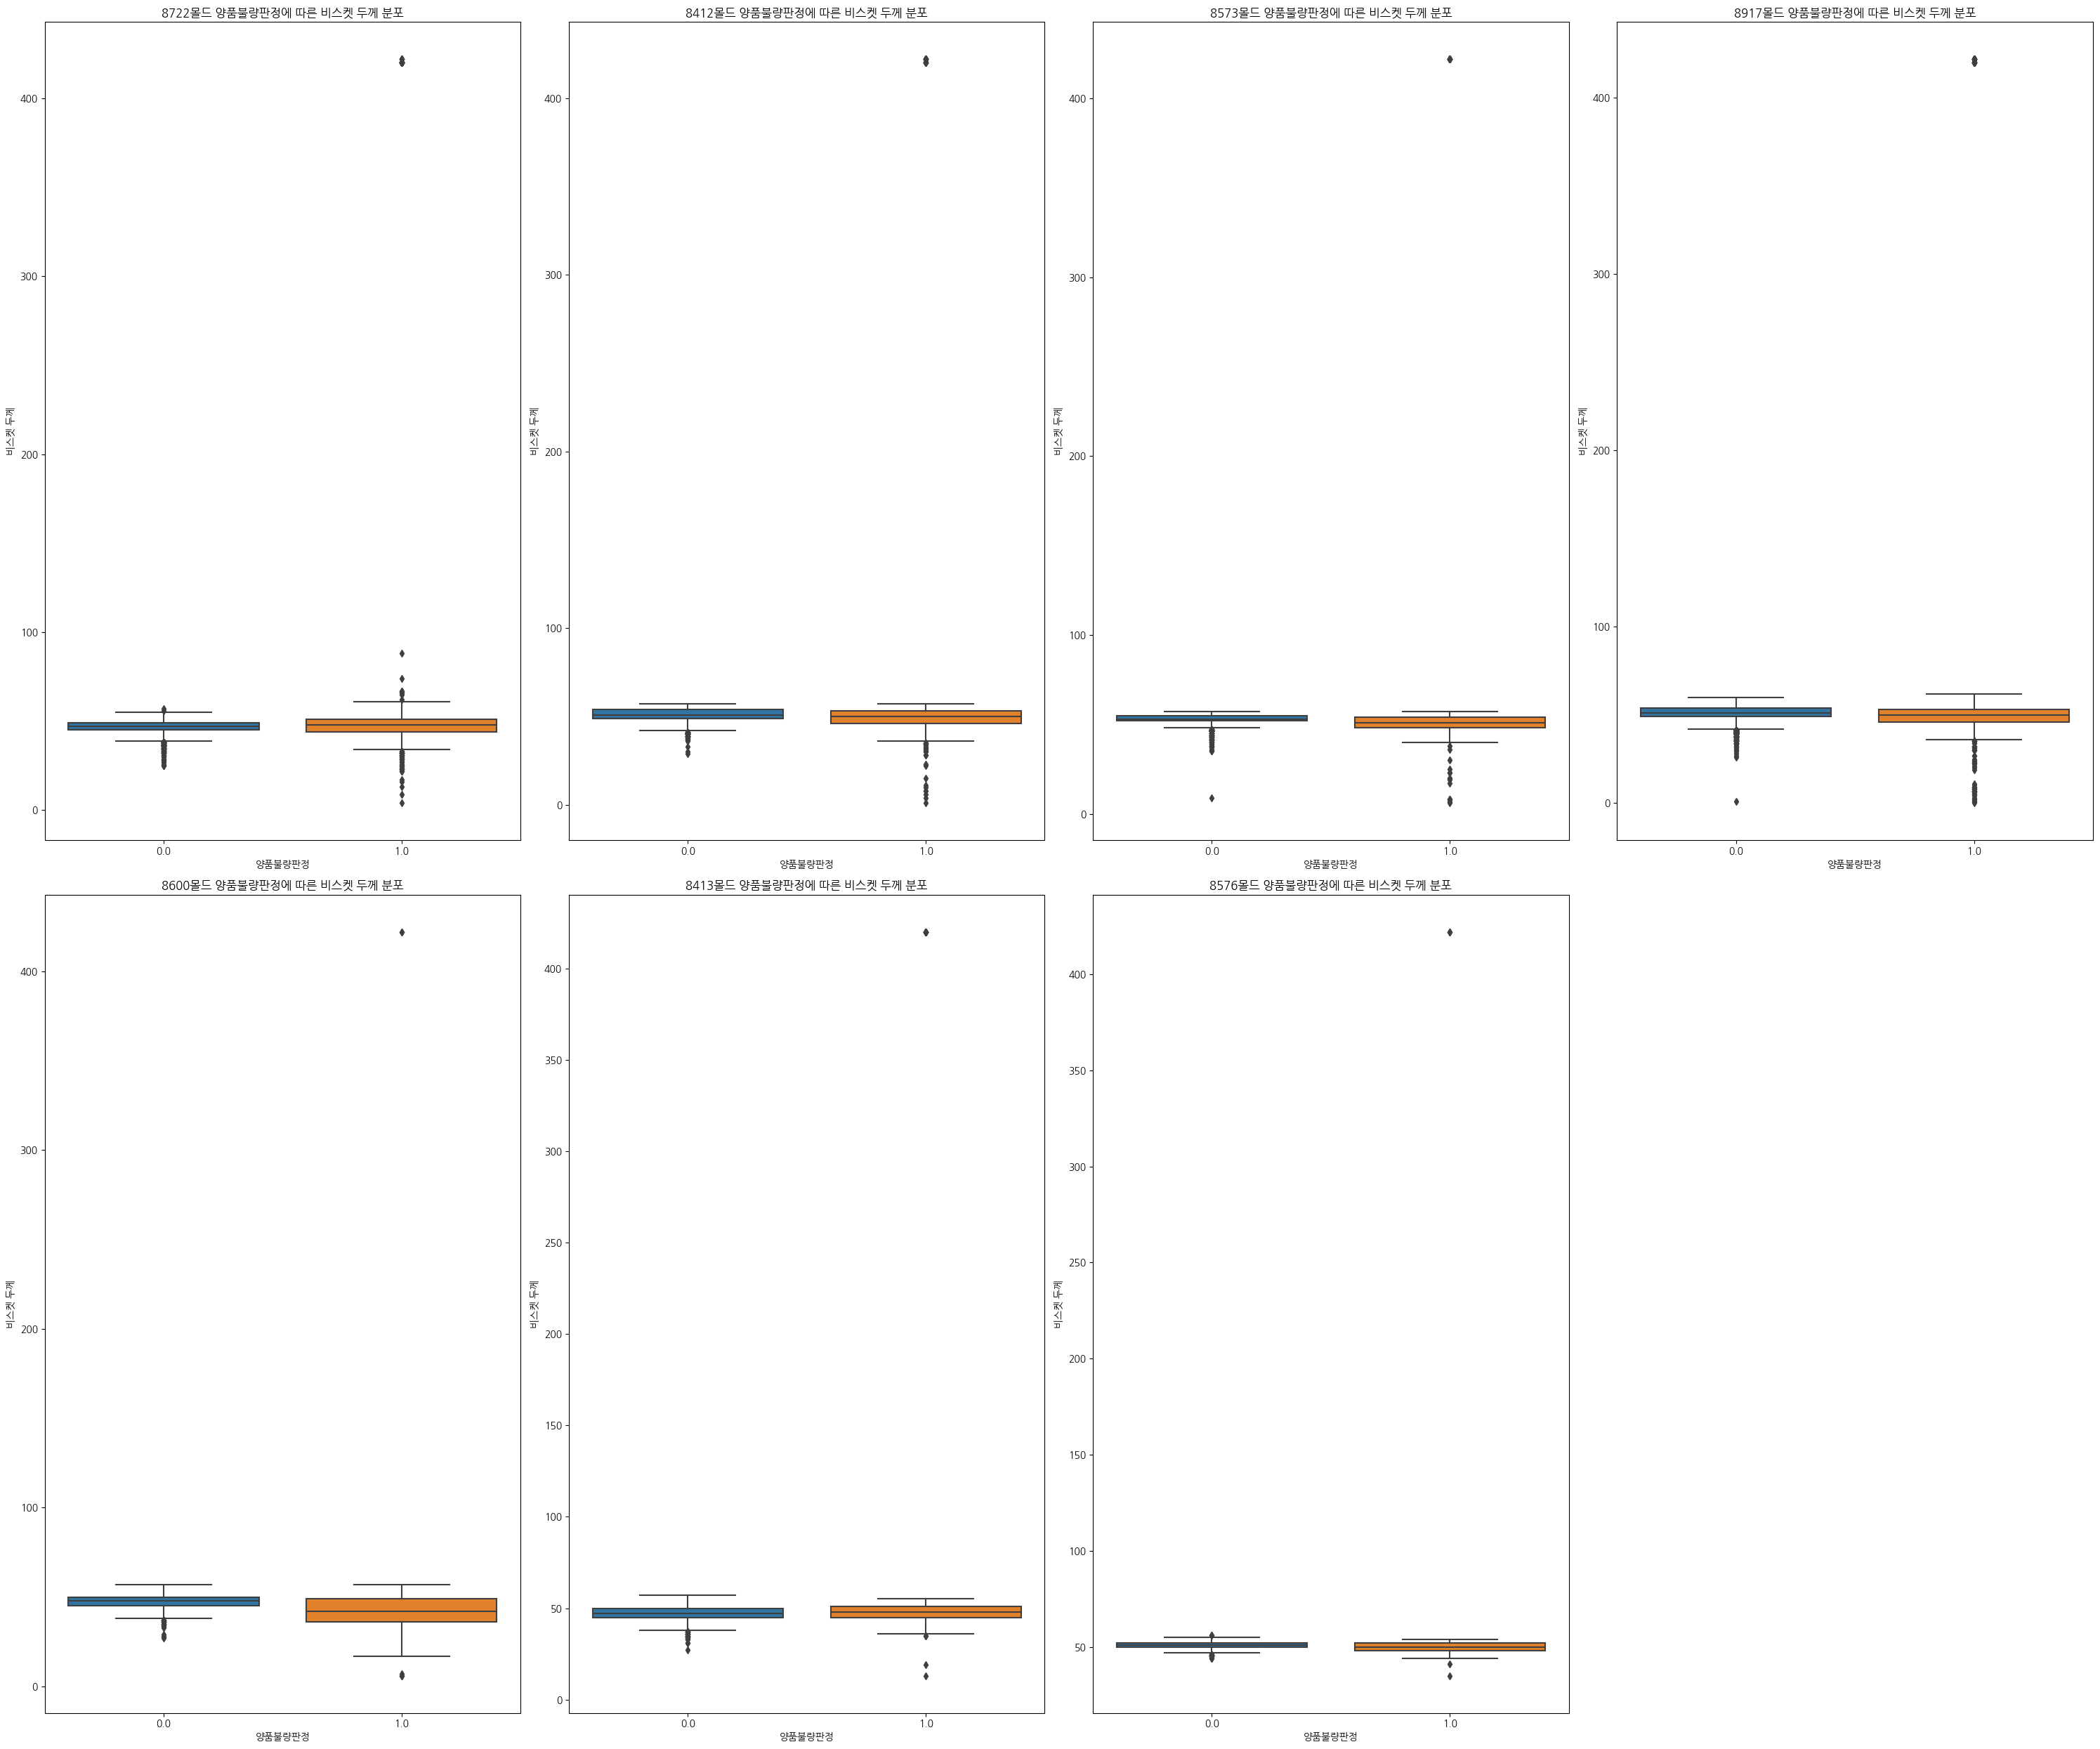

In [63]:
fig = plt.figure(figsize = (30, 25))
j = 1
for i in train['금형코드'].unique():
    ax = fig.add_subplot(2, 4, j)
    ax = sns.boxplot(data = train[train['금형코드'] == i], x='양품불량판정',
                    y='비스켓 두께')
    # ax.set_ylim(6900, 8900)
    # ax.set_xlim(0, 24)
    j += 1
    ax.set_title(f'{i}몰드 양품불량판정에 따른 비스켓 두께 분포')

# plt.grid(False)
# plt.title('날짜에 따른 전력사용량')
# plt.xlabel('날짜')
# plt.ylabel('전력사용량(kWh)', rotation = True, labelpad = 20)
fig.tight_layout()
plt.show()

## 상금형온도

### 상금형온도1

In [64]:
train.상금형온도1.unique()

array([ 198.,  250.,  268.,  276.,  279.,  280.,  245.,  270.,  277.,
        282.,  284.,  285.,  286.,  283.,   24.,  281.,   26.,  275.,
         31.,   36.,   41.,   40.,   52.,  224.,   53.,  260.,   47.,
         58.,   51.,   67.,   70.,   72.,   63.,   77.,  265.,   64.,
         71.,   75.,   79.,   81.,   61.,   54.,   50.,  231.,   57.,
        263.,  142.,  184.,  220.,  168.,  247.,  194.,  256.,  212.,
        266.,  216.,  273.,  217.,  274.,  221.,  225.,  278.,  226.,
        227.,  228.,  229.,  235.,  252.,  269.,  230.,  156.,  207.,
        222.,  233.,  232.,  234.,  214.,  254.,  267.,  175.,  215.,
        236.,  237.,  145.,  165.,  210.,  223.,  173.,  205.,  155.,
        202.,  157.,  219.,  259.,  238.,  261.,  147.,  201.,  218.,
        272.,  172.,  258.,  255.,  186.,  271.,  239.,  200.,  171.,
        243.,  182.,  170.,  257.,  213.,  240.,  249.,  159.,  166.,
        211.,  209.,  141.,  110.,  189.,  253.,  241.,  242.,  293.,
        317.,  120.,

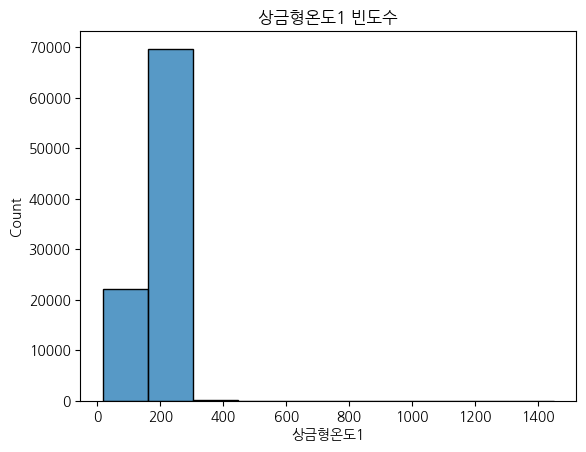

In [65]:
fig, ax = plt.subplots()

ax = sns.histplot(data = train, x = '상금형온도1', bins = 10)
plt.title('상금형온도1 빈도수')
plt.show()

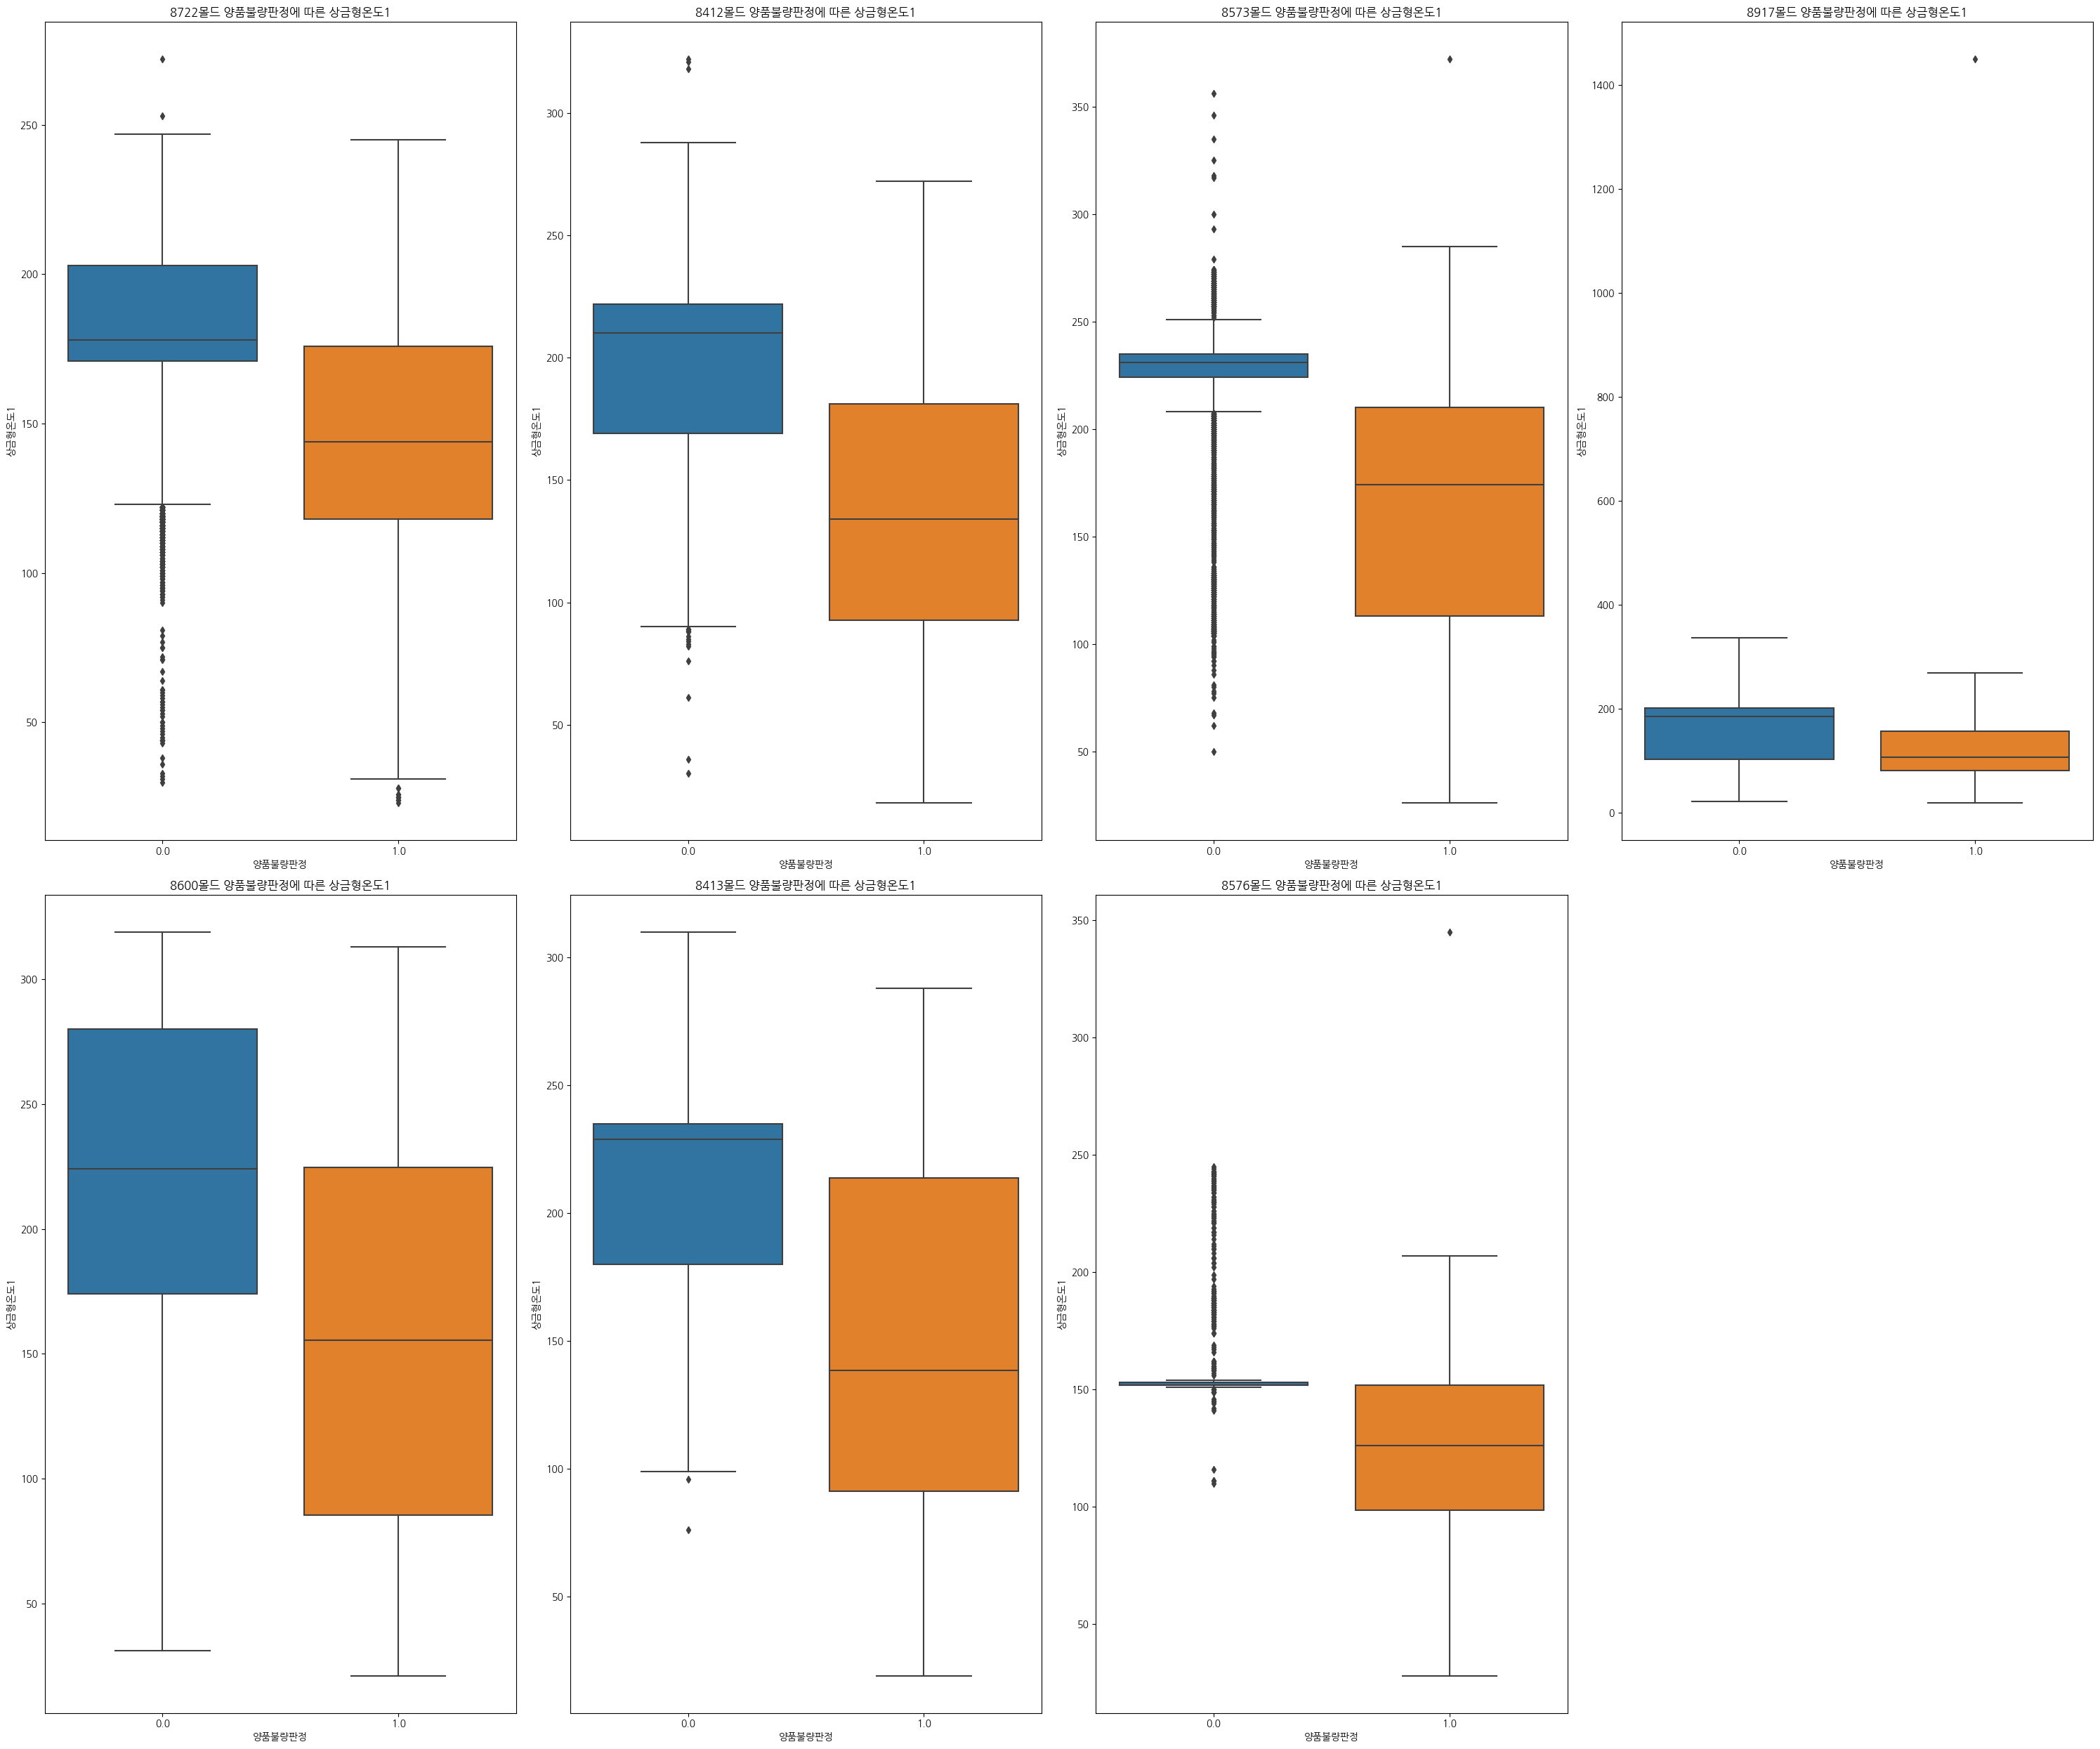

In [66]:
fig = plt.figure(figsize = (30, 25))
j = 1
for i in train['금형코드'].unique():
    ax = fig.add_subplot(2, 4, j)
    ax = sns.boxplot(data = train[train['금형코드'] == i], x='양품불량판정',
                    y='상금형온도1')
    # ax.set_ylim(6900, 8900)
    # ax.set_xlim(0, 24)
    j += 1
    ax.set_title(f'{i}몰드 양품불량판정에 따른 상금형온도1')

# plt.grid(False)
# plt.title('날짜에 따른 전력사용량')
# plt.xlabel('날짜')
# plt.ylabel('전력사용량(kWh)', rotation = True, labelpad = 20)
fig.tight_layout()
plt.show()

### 상금형온도2

In [67]:
train.상금형온도2.unique()

array([ 116.,  113.,  122.,  128.,  133.,  136.,  138.,  135.,  137.,
        140.,  142.,  144.,  145.,  146.,  147.,   33.,   55.,  143.,
         65.,   73.,   78.,   74.,   81.,  126.,   84.,  134.,   86.,
        139.,   87.,  141.,   89.,   91.,   94.,   95.,   90.,   56.,
         77.,   88.,   93.,   96.,   98.,  148.,  149.,   99.,  101.,
        102.,  103.,  104.,  129.,  107.,   80.,  106.,  112.,  119.,
        153.,  127.,  158.,  167.,  132.,  171.,  176.,  178.,  180.,
        182.,  183.,  185.,  123.,  186.,  125.,  131.,  187.,  188.,
        174.,  189.,  190.,  191.,  192.,  194.,  193.,  195.,  196.,
        197.,  198.,  200.,  199.,  201.,  202.,  162.,  179.,  151.,
        165.,  181.,  173.,   44.,   66.,   79.,   97.,  109.,  114.,
        117.,  203.,  204.,  121.,  124.,  205.,  130.,  166.,  118.,
        105.,  206.,   72.,  207.,  160.,  175.,  184.,  172.,  154.,
        161.,  164.,  209.,  210.,  115.,  150.,  159.,  170.,  177.,
        169.,  100.,

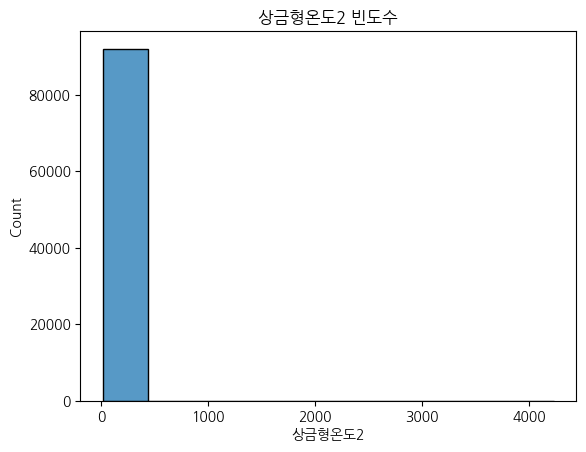

In [68]:
fig, ax = plt.subplots()

ax = sns.histplot(data = train, x = '상금형온도2', bins = 10)
plt.title('상금형온도2 빈도수')
plt.show()

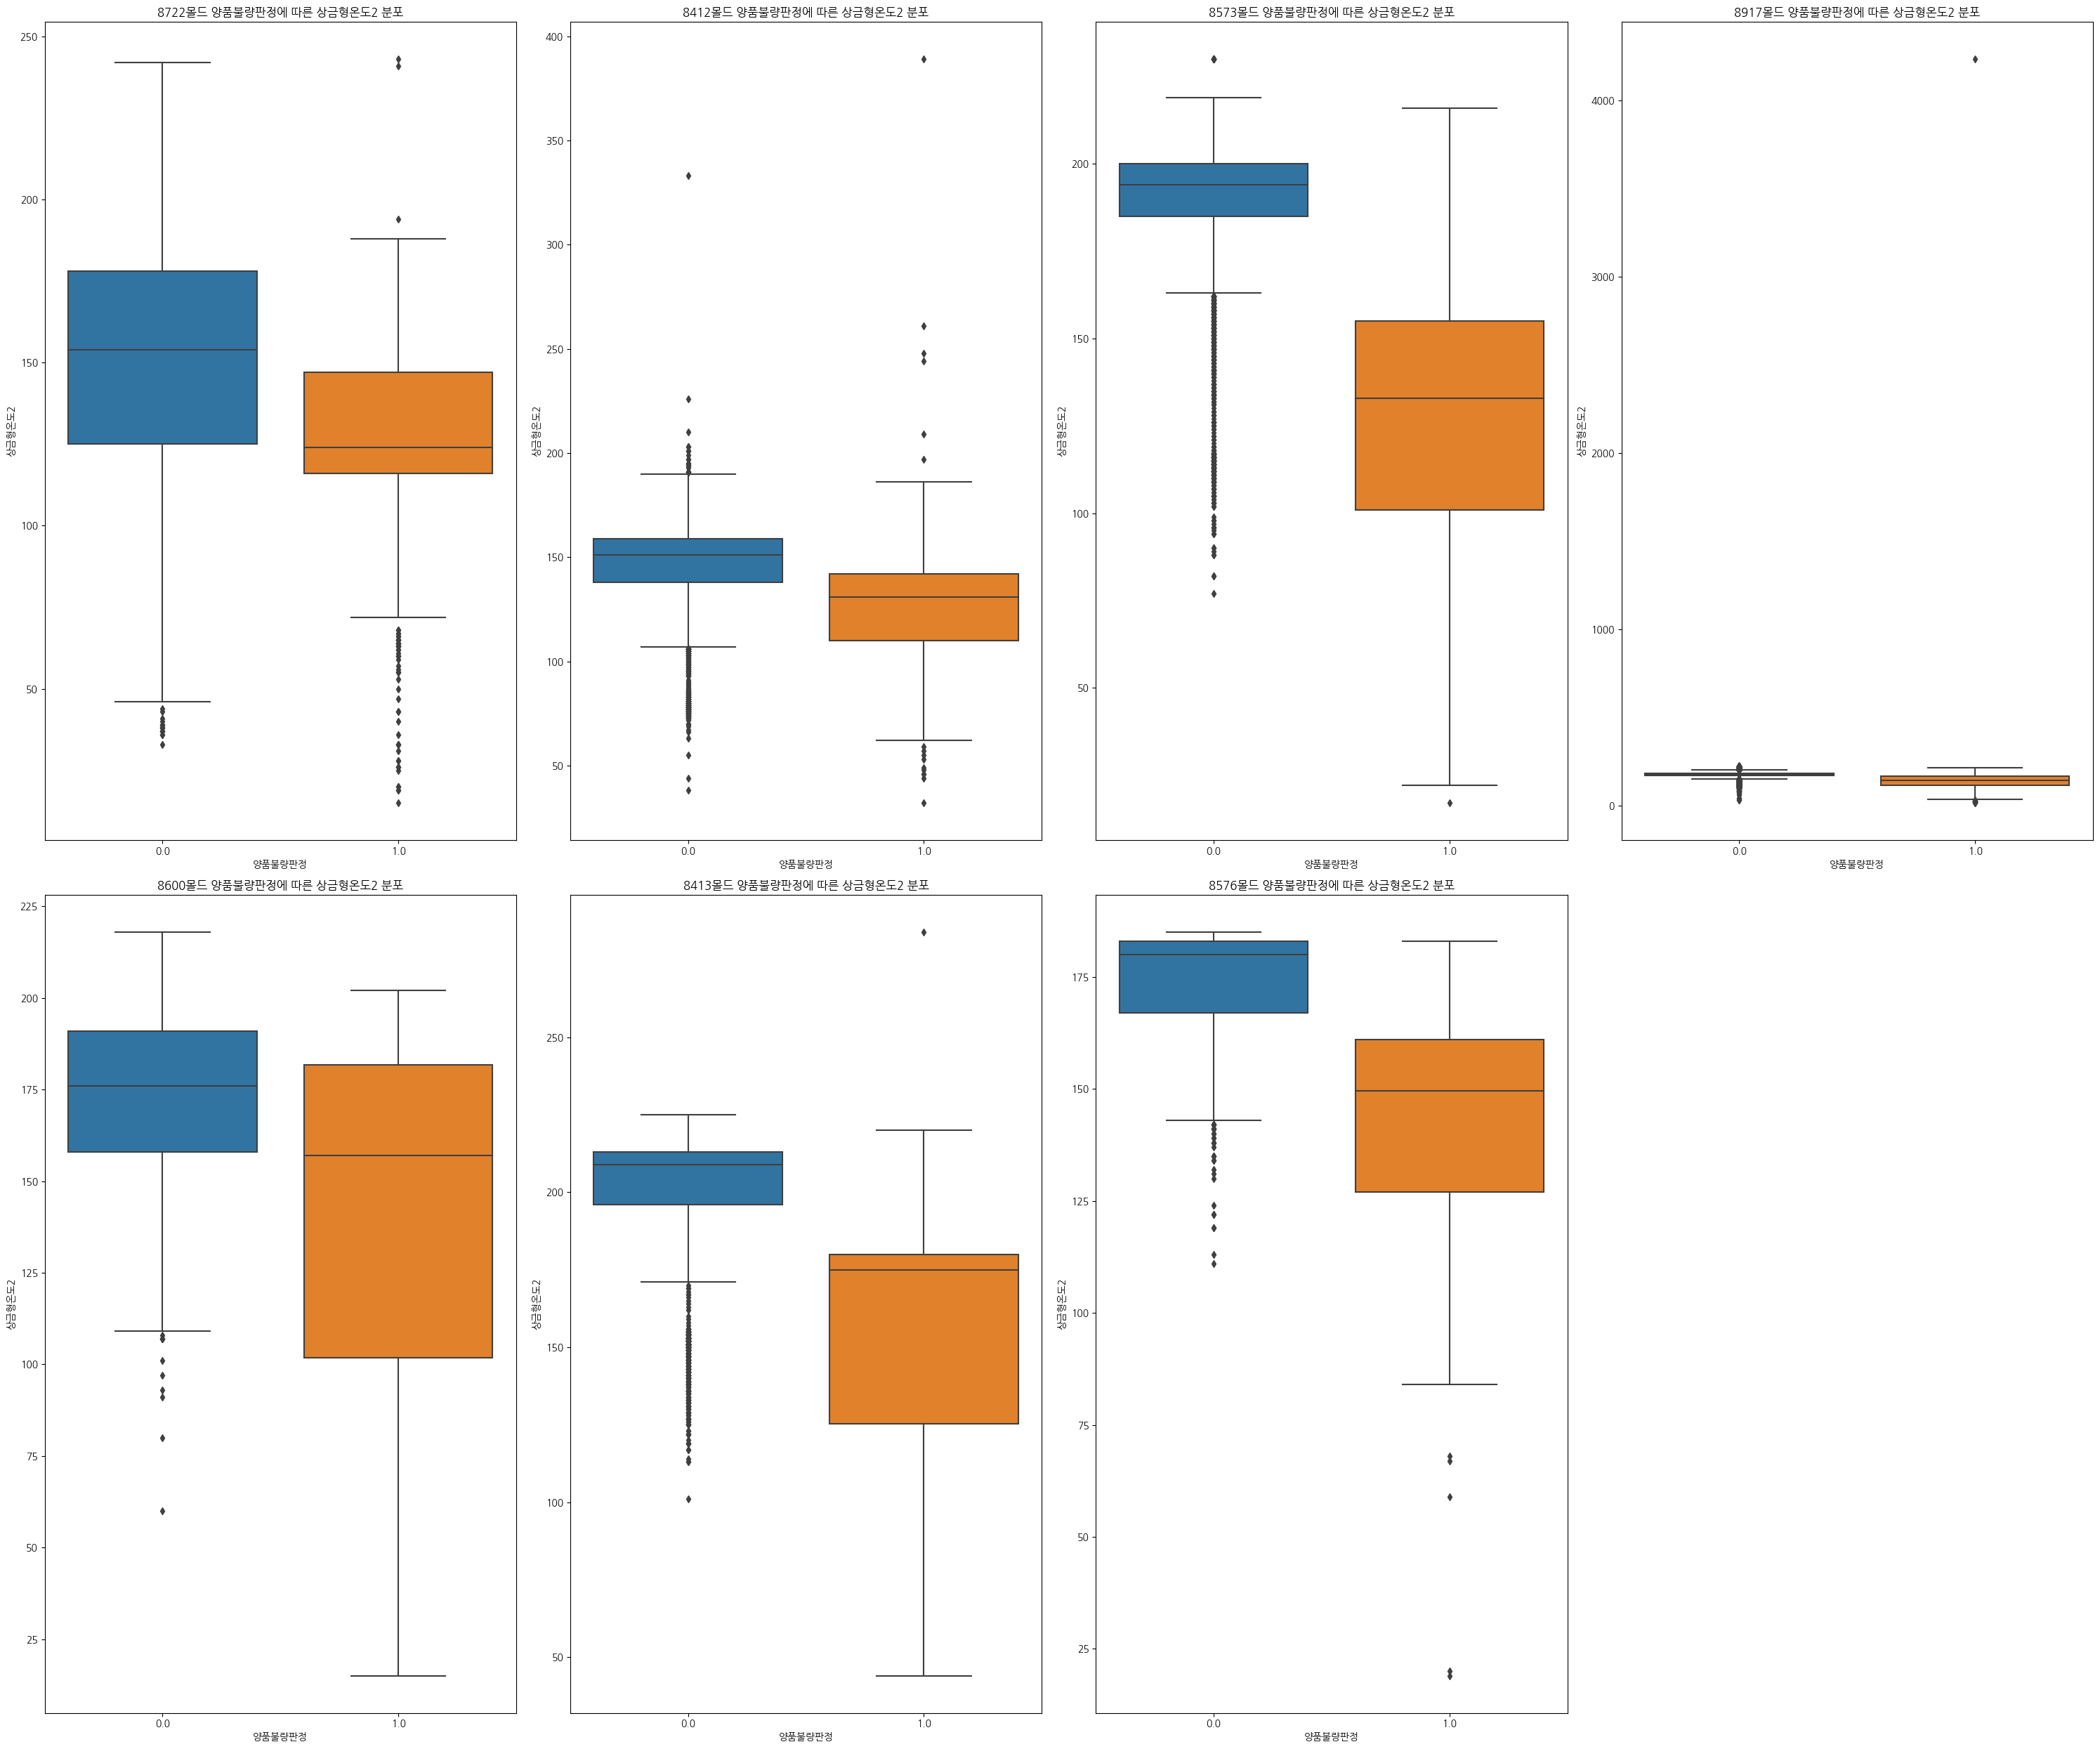

In [69]:
fig = plt.figure(figsize = (30, 25))
j = 1
for i in train['금형코드'].unique():
    ax = fig.add_subplot(2, 4, j)
    ax = sns.boxplot(data = train[train['금형코드'] == i], x='양품불량판정',
                    y='상금형온도2')
    # ax.set_ylim(6900, 8900)
    # ax.set_xlim(0, 24)
    j += 1
    ax.set_title(f'{i}몰드 양품불량판정에 따른 상금형온도2 분포')

# plt.grid(False)
# plt.title('날짜에 따른 전력사용량')
# plt.xlabel('날짜')
# plt.ylabel('전력사용량(kWh)', rotation = True, labelpad = 20)
fig.tight_layout()
plt.show()

### 상금형온도3

In [70]:
train.상금형온도3.unique()

array([1449.,   nan,  101.,  106.,  113.,  119.,  129.,  132.,  137.,
        135.,  136.,  138.,  139.,  142.,  141.,  143.,  140.,  117.,
        133.,  145.,  146.,  148.,  150.,  144.,  149.,  152.,  147.,
        114.,  115.,  130.,   91.,  124.,  131.,  134.,  122.,  153.,
        151.,  155.,  125.,  154.,  164.,   97.,  123.,  126.,   96.,
        107.,  116.,  121.,  127.,  156.,  157.,  158.,  160.,  159.,
        112.,  161.,  162.,  172.,  193.,  171.,  166.,  128.,  102.,
         81.,   94.,  104.,   86.,  105.,   77.,  110.,   98.,  111.,
         95.,  118.,   83.,   79.,  100.,  109.,  120.,   93.,  103.,
        108.,   92.,   57.,   82.,   99.,   89.,   70.,   75.,   90.,
         87.,   88.,   84.,   67.,   85.,   78.,   69.,   71.,  165.,
         63.,   76.,   74.,   80.,   68.,   55.,   72.,   64.,   73.,
         66.,   65.,   56.,   52.,   62.,   58.,   47.,   44.,   42.,
         60.])

In [71]:
%matplotlib inline

In [72]:
train[train['상금형온도1'] >= 600].groupby('양품불량판정').count()

,작업라인,제품명,금형명,수집날짜,수집일시,일자별 제품 생산 번호,가동여부,비상정지,용탕온도,설비 작동 사이클시간,...,하금형온도2,하금형온도3,슬리브온도,형체력,냉각수 온도,전자교반 가동시간,등록일시,사탕신호,금형코드,가열로
양품불량판정,,,,,,,,,,,,,,,,,,,,,
1.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,1,1


In [73]:
train[train['상금형온도2'] >= 1000].groupby('양품불량판정').count()

,작업라인,제품명,금형명,수집날짜,수집일시,일자별 제품 생산 번호,가동여부,비상정지,용탕온도,설비 작동 사이클시간,...,하금형온도2,하금형온도3,슬리브온도,형체력,냉각수 온도,전자교반 가동시간,등록일시,사탕신호,금형코드,가열로
양품불량판정,,,,,,,,,,,,,,,,,,,,,
1.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,1,0


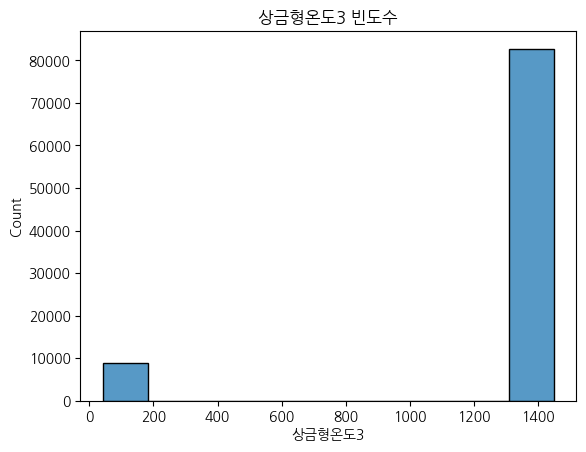

In [74]:
fig, ax = plt.subplots()

ax = sns.histplot(data = train, x = '상금형온도3', bins = 10)
plt.title('상금형온도3 빈도수')
plt.show()

In [75]:
train[train['상금형온도3'] <= 1000].groupby('양품불량판정').count()

,작업라인,제품명,금형명,수집날짜,수집일시,일자별 제품 생산 번호,가동여부,비상정지,용탕온도,설비 작동 사이클시간,...,하금형온도2,하금형온도3,슬리브온도,형체력,냉각수 온도,전자교반 가동시간,등록일시,사탕신호,금형코드,가열로
양품불량판정,,,,,,,,,,,,,,,,,,,,,
0.0,8565,8565,8565,8565,8565,8565,8565,8565,8565,8565,...,8565,8565,8565,8565,8565,8565,8565,0,8565,8565
1.0,378,378,378,378,378,378,378,378,378,378,...,378,378,378,378,378,378,378,0,378,378


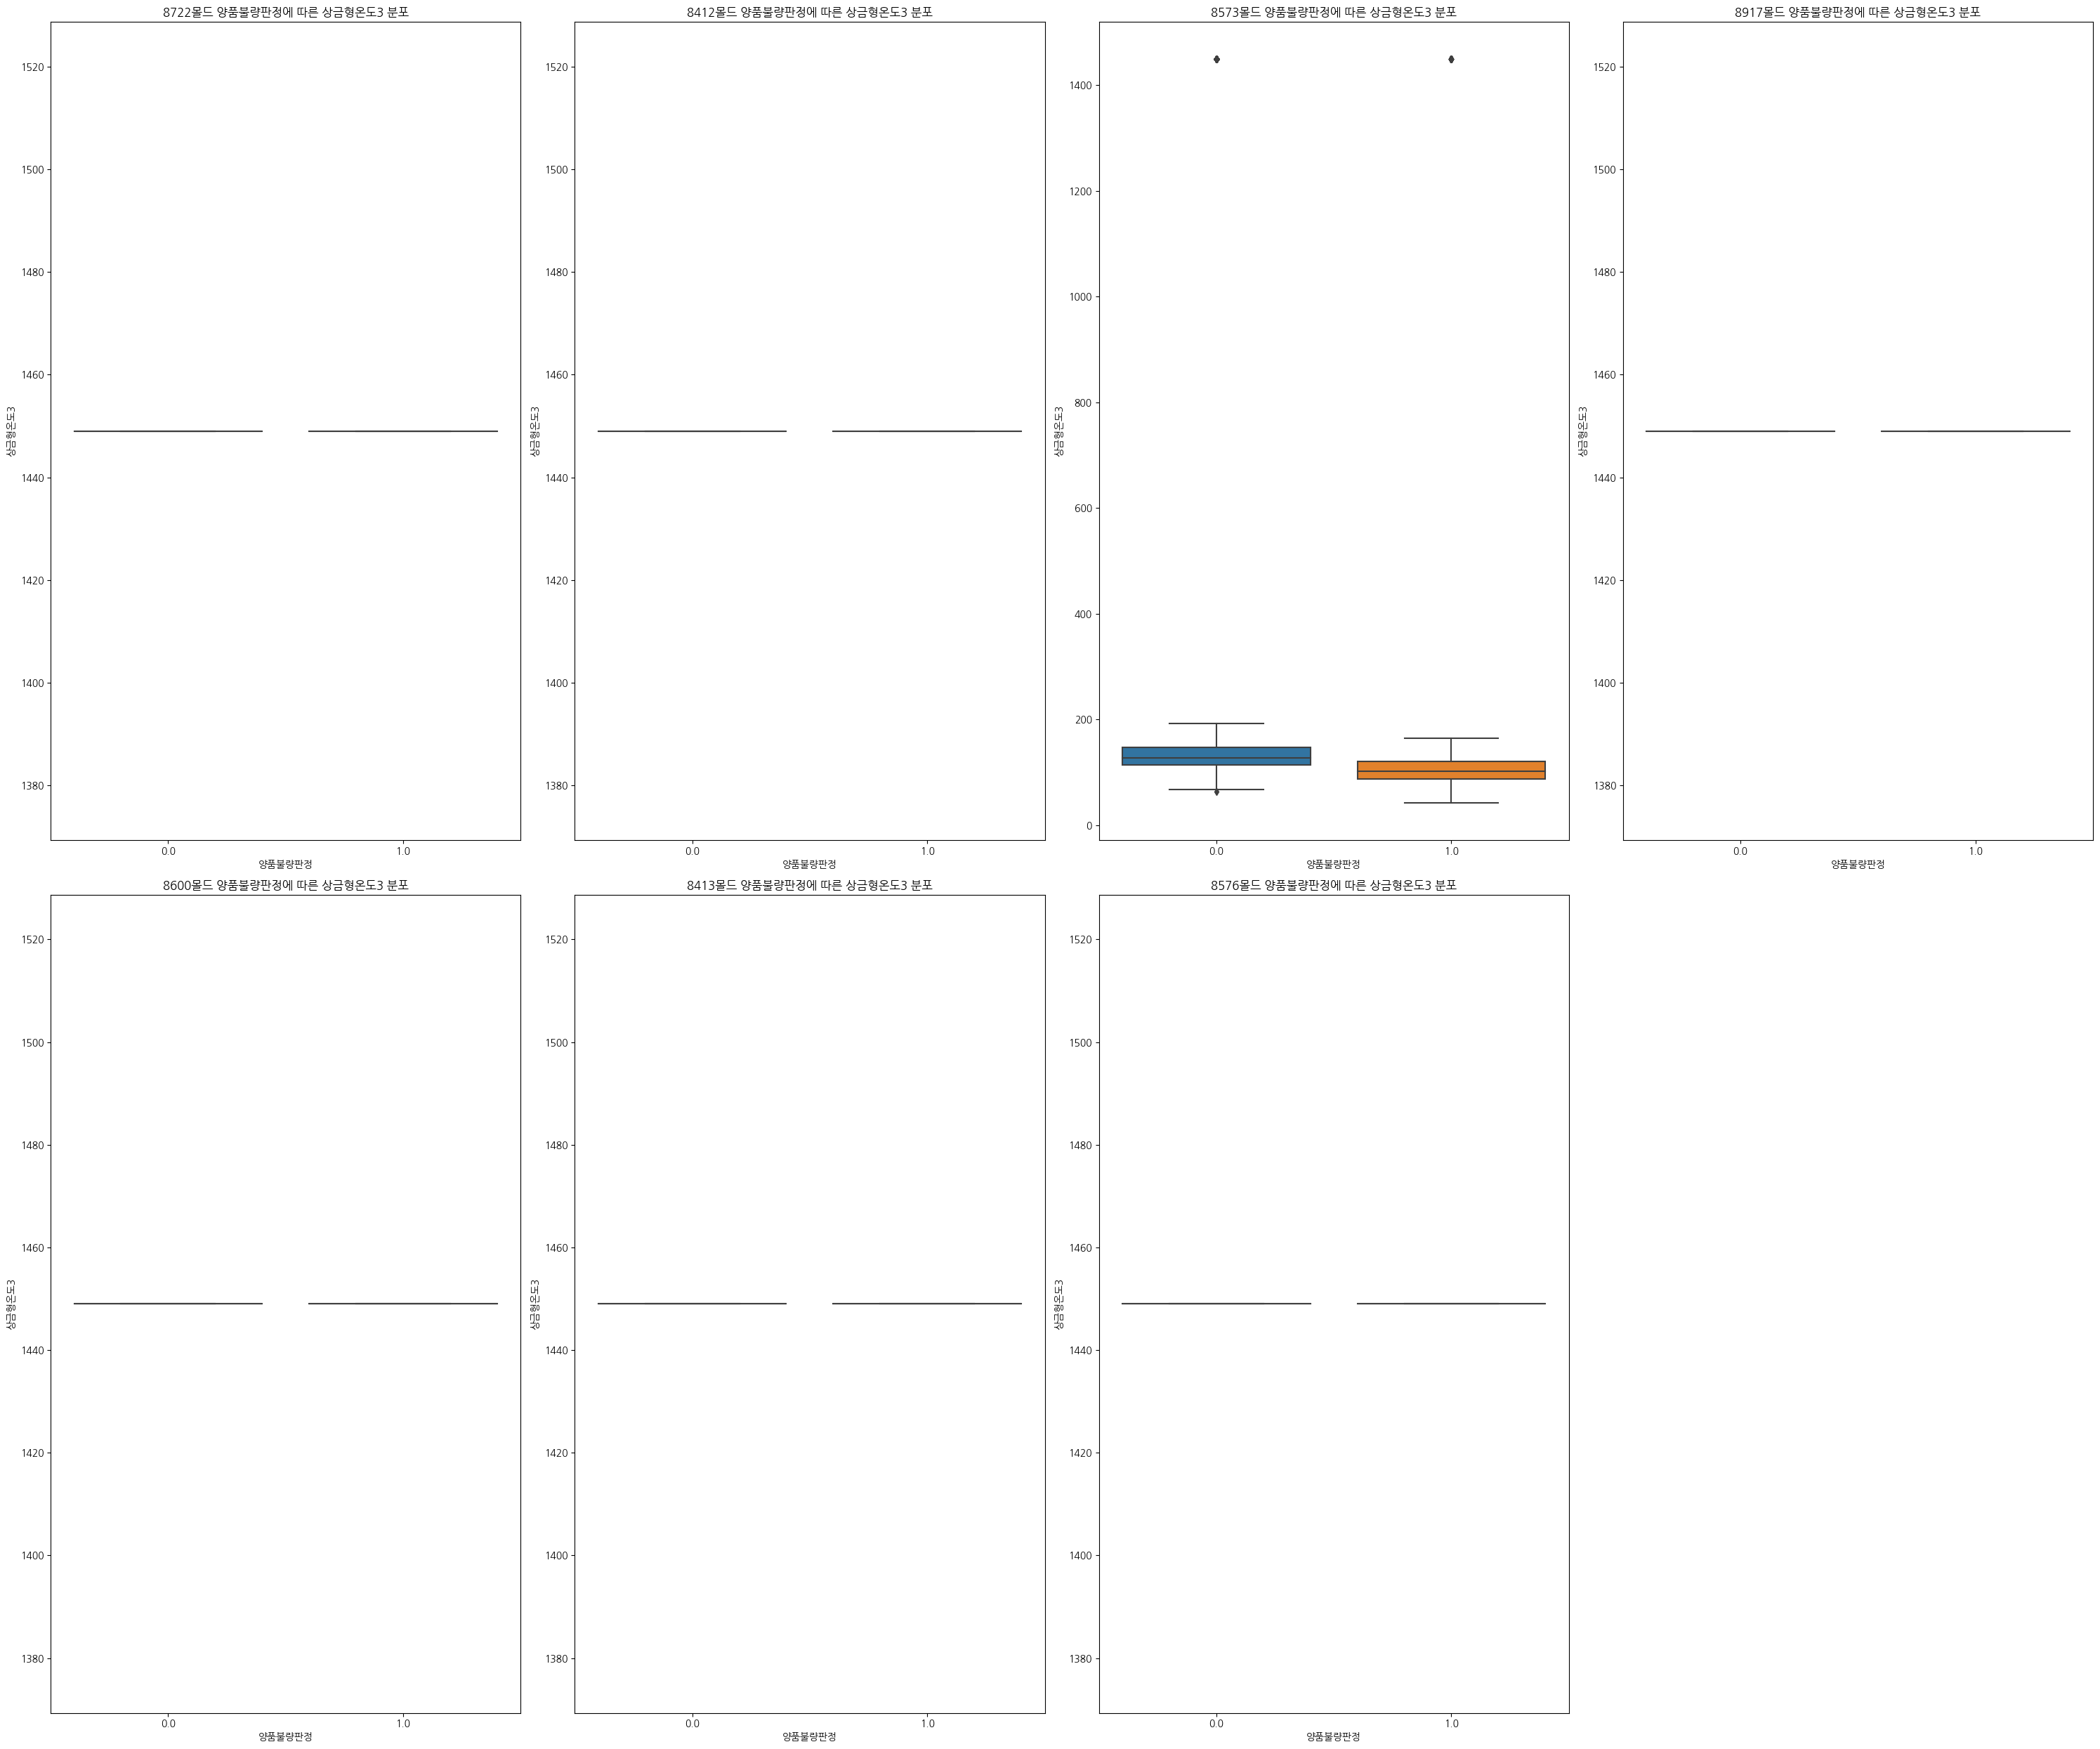

In [76]:
fig = plt.figure(figsize = (30, 25))
j = 1
for i in train['금형코드'].unique():
    ax = fig.add_subplot(2, 4, j)
    ax = sns.boxplot(data = train[train['금형코드'] == i], x='양품불량판정',
                    y='상금형온도3')
    # ax.set_ylim(6900, 8900)
    # ax.set_xlim(0, 24)
    j += 1
    ax.set_title(f'{i}몰드 양품불량판정에 따른 상금형온도3 분포')

# plt.grid(False)
# plt.title('날짜에 따른 전력사용량')
# plt.xlabel('날짜')
# plt.ylabel('전력사용량(kWh)', rotation = True, labelpad = 20)
fig.tight_layout()
plt.show()

## 하금형온도

### 하금형온도1

In [77]:
train.하금형온도1.unique()

array([234., 208., 211., 216., 220., 224., 227., 229., 230., 231., 233.,
       235., 236., 238., 239., 240., 241., 242.,  30.,  31., 243.,  32.,
        33.,  35.,  36., 237.,  38.,  39.,  41.,  43.,  44.,  46.,  47.,
        49.,  51.,  56.,  57.,  58., 244.,  59.,  60.,  61.,  62., 245.,
        63.,  64.,  65.,  66.,  67.,  68.,  69., 162., 155., 158., 127.,
       148., 169., 163., 177., 171., 184., 190., 176., 195., 185., 200.,
       204., 194., 207., 197., 209., 212., 201., 202., 214., 217., 205.,
       215., 206., 218., 219., 168., 222., 186., 223., 196., 225., 226.,
       228., 210., 232., 213., 198., 188., 118., 153., 175., 193., 161.,
       199., 203., 110., 117., 130., 144., 165., 173., 181., 187., 221.,
       182., 164., 167., 174., 136., 179.,  99., 131., 189., 178., 192.,
       180., 191., 249., 253., 143., 183.,  97., 134., 122., 128.,  82.,
       113., 137., 170.,  88., 125., 145., 172.,  98.,  96., 123., 147.,
       151., 135., 166.,  95., 149., 152., 150., 11

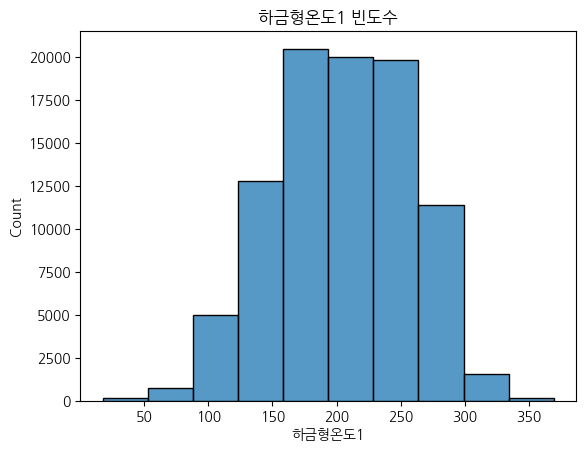

In [78]:
fig, ax = plt.subplots()

ax = sns.histplot(data = train, x = '하금형온도1', bins = 10)
plt.title('하금형온도1 빈도수')
plt.show()

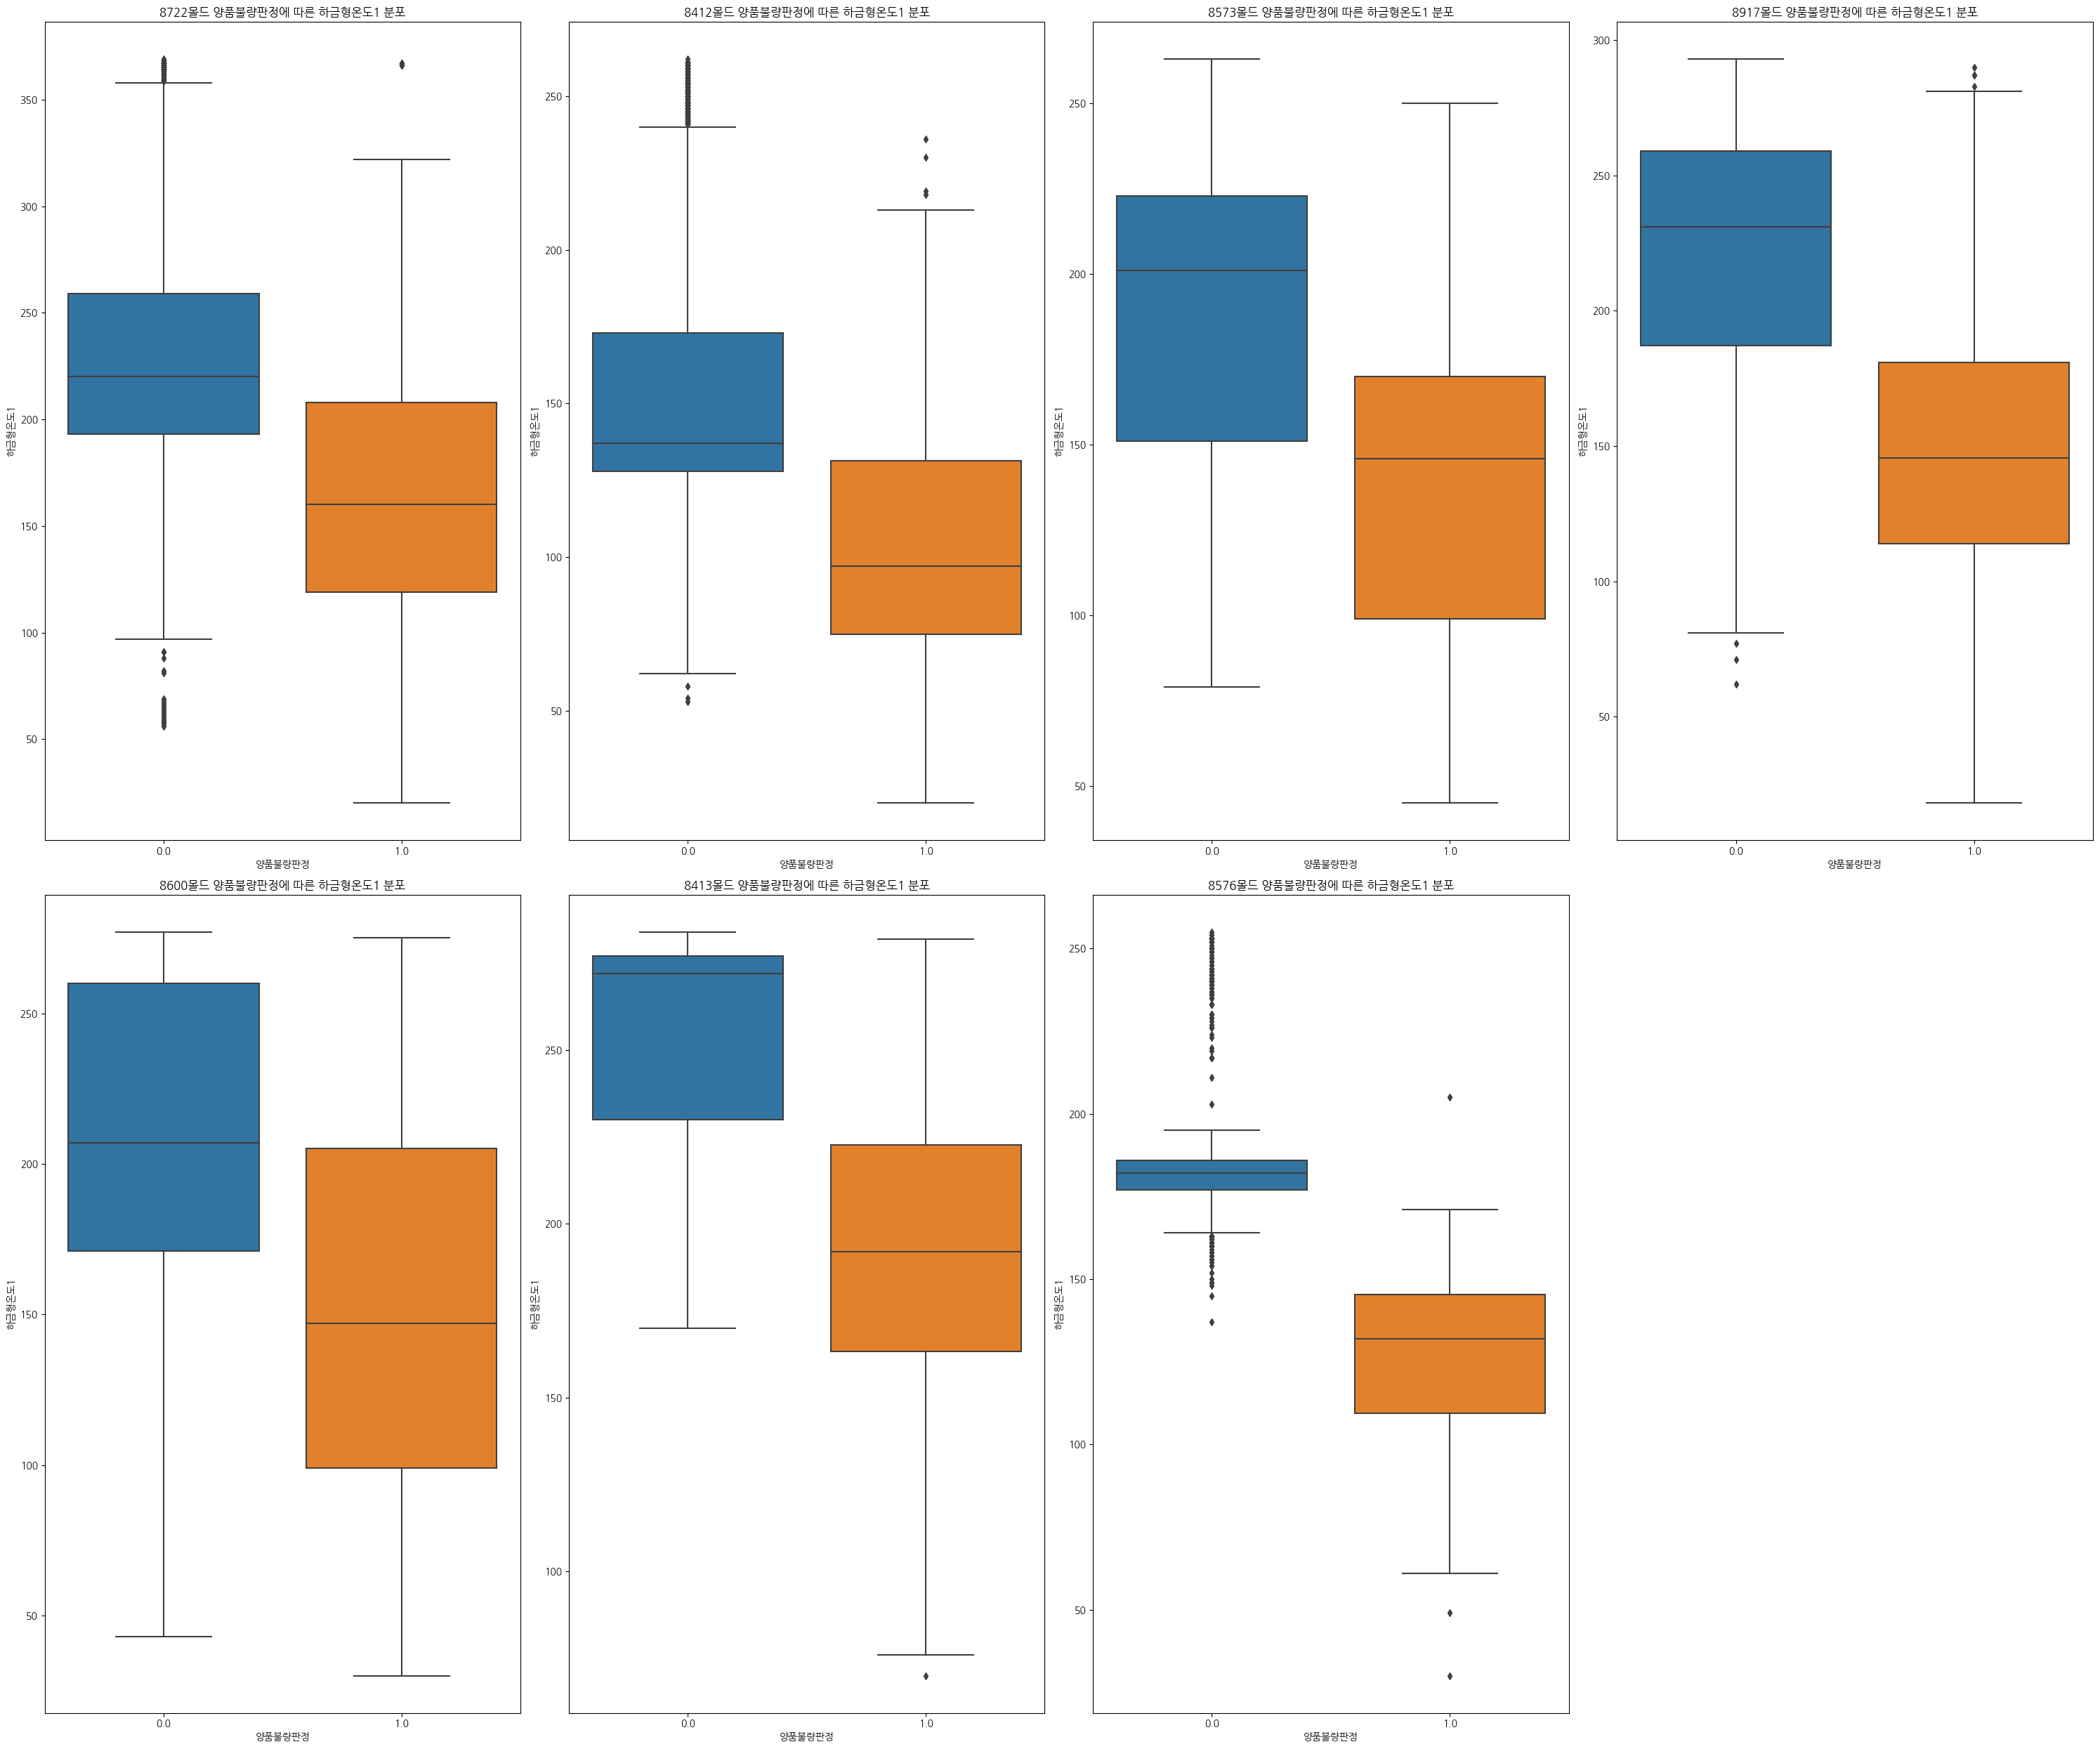

In [79]:
fig = plt.figure(figsize = (30, 25))
j = 1
for i in train['금형코드'].unique():
    ax = fig.add_subplot(2, 4, j)
    ax = sns.boxplot(data = train[train['금형코드'] == i], x='양품불량판정',
                    y='하금형온도1')
    # ax.set_ylim(6900, 8900)
    # ax.set_xlim(0, 24)
    j += 1
    ax.set_title(f'{i}몰드 양품불량판정에 따른 하금형온도1 분포')

# plt.grid(False)
# plt.title('날짜에 따른 전력사용량')
# plt.xlabel('날짜')
# plt.ylabel('전력사용량(kWh)', rotation = True, labelpad = 20)
fig.tight_layout()
plt.show()

### 하금형온도2

In [80]:
train.하금형온도2.unique()

array([ 316.,  163.,  179.,  187.,  195.,  197.,  199.,  189.,  198.,
        205.,  207.,  209.,  212.,  215.,  210.,  211.,  273.,  323.,
        343.,  394.,  409.,  426.,  213.,  182.,  438.,  193.,  449.,
        202.,  456.,  204.,  461.,  206.,  467.,  473.,  478.,  482.,
        208.,  476.,  481.,  201.,  214.,  395.,  425.,  448.,  463.,
        471.,  479.,  484.,  487.,  490.,  492.,  493.,  495.,  497.,
        499.,  504.,   96.,  117.,  128.,  136.,  146.,  145.,  159.,
        155.,  167.,  170.,  171.,  174.,  181.,  178.,  186.,  177.,
        190.,  192.,  194.,  184.,  196.,  191.,  162.,  166.,  200.,
        164.,  183.,  188.,  203.,  157.,  173.,  176.,  161.,  120.,
        149.,  168.,  152.,  172.,  175.,   50.,   86.,  106.,  130.,
        140.,  150.,  169.,  153.,  180.,  185.,  110.,  125.,  143.,
        156.,   99.,  132.,  158.,  137.,  144.,  129.,  216.,  217.,
        218.,  219.,  220.,  238.,  231.,  227.,  223.,   98.,  133.,
        114.,  147.,

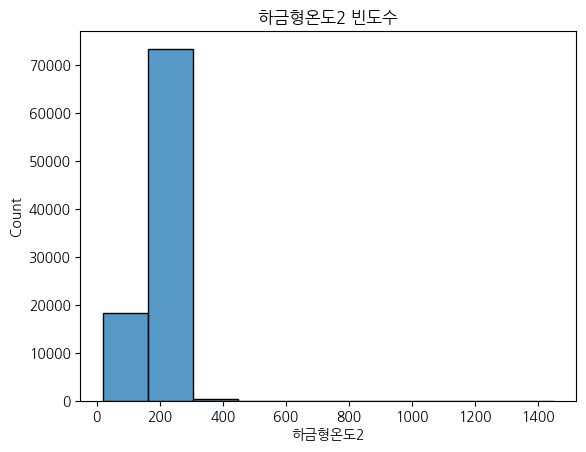

In [81]:
fig, ax = plt.subplots()

ax = sns.histplot(data = train, x = '하금형온도2', bins = 10)
plt.title('하금형온도2 빈도수')
plt.show()

In [82]:
fig = plt.figure(figsize = (30, 25))
j = 1
for i in train['금형코드'].unique():
    ax = fig.add_subplot(2, 4, j)
    ax = sns.boxplot(data = train[train['금형코드'] == i], x='양품불량판정',
                    y='하금형온도2')
    # ax.set_ylim(6900, 8900)
    # ax.set_xlim(0, 24)
    j += 1
ㅌ    ax.set_title(f'{i}몰드 양품불량판정에 따른 하금형온도2 분포')

# plt.grid(False)
# plt.title('날짜에 따른 전력사용량')
# plt.xlabel('날짜')
# plt.ylabel('전력사용량(kWh)', rotation = True, labelpad = 20)
fig.tight_layout()
plt.show()

SyntaxError: invalid syntax (3013205686.py, line 10)

### 하금형온도3

In [ ]:
train.하금형온도3.unique()

In [ ]:
fig, ax = plt.subplots()

ax = sns.histplot(data = train[train['하금형온도3'] <= 60000], x = '하금형온도3', bins = 10)
plt.title('하금형온도3 빈도수')
plt.show()

In [ ]:
train[train['하금형온도3'] <= 1300].groupby('양품불량판정').count()

In [ ]:
fig = plt.figure(figsize = (30, 25))
j = 1
for i in train['금형코드'].unique():
    ax = fig.add_subplot(2, 4, j)
    ax = sns.boxplot(data = train[train['금형코드'] == i], x='양품불량판정',
                    y='하금형온도3')
    # ax.set_ylim(6900, 8900)
    # ax.set_xlim(0, 24)
    j += 1
    ax.set_title(f'{i}몰드 양품불량판정에 따른 하금형온도3 분포')

# plt.grid(False)
# plt.title('날짜에 따른 전력사용량')
# plt.xlabel('날짜')
# plt.ylabel('전력사용량(kWh)', rotation = True, labelpad = 20)
fig.tight_layout()
plt.show()

## 슬리브온도

In [ ]:
fig = plt.figure(figsize = (30, 25))
j = 1
for i in train['금형코드'].unique():
    ax = fig.add_subplot(2, 4, j)
    ax = sns.boxplot(data = train[train['금형코드'] == i], x='양품불량판정',
                    y='슬리브온도')
    # ax.set_ylim(6900, 8900)
    # ax.set_xlim(0, 24)
    j += 1
    ax.set_title(f'{i}몰드 양품불량 판정에 따른 슬리브온도 분포')

# plt.grid(False)
# plt.title('날짜에 따른 전력사용량')
# plt.xlabel('날짜')
# plt.ylabel('전력사용량(kWh)', rotation = True, labelpad = 20)
fig.tight_layout()
plt.show()

## 형체력

In [ ]:
train['형체력'].unique()

In [ ]:
fig, ax = plt.subplots()

ax = sns.boxplot(data = train[train['형체력'] <= 60000], x = '양품불량판정', y = '형체력')
plt.title('양품불량판정에 따른 형체력 분포')
plt.show()

In [ ]:
fig = plt.figure(figsize = (30, 25))
j = 1
for i in train['금형코드'].unique():
    ax = fig.add_subplot(2, 4, j)
    ax = sns.boxplot(data = train[train['금형코드'] == i], x='양품불량판정',
                    y='형체력')
    # ax.set_ylim(6900, 8900)
    # ax.set_xlim(0, 24)
    j += 1
    ax.set_title(f'{i}몰드 양품불량 판정에 따른 형체력 분포')

# plt.grid(False)
# plt.title('날짜에 따른 전력사용량')
# plt.xlabel('날짜')
# plt.ylabel('전력사용량(kWh)', rotation = True, labelpad = 20)
fig.tight_layout()
plt.show()

## 냉각수 온도

In [ ]:
train['냉각수 온도'].unique()

In [ ]:
fig, ax = plt.subplots()

ax = sns.histplot(data = train[train['냉각수 온도'] <= 1000], x = '냉각수 온도')
plt.title('냉각수 온도 빈도수 분포')
plt.show()

In [ ]:
fig = plt.figure(figsize = (30, 25))
j = 1
for i in train['금형코드'].unique():
    ax = fig.add_subplot(2, 4, j)
    ax = sns.boxplot(data = train[train['금형코드'] == i], x='양품불량판정',
                    y='냉각수 온도')
    # ax.set_ylim(6900, 8900)
    # ax.set_xlim(0, 24)
    j += 1
    ax.set_title(f'{i}몰드 양품불량판정에 따른 냉각수 온도 분포')

# plt.grid(False)
# plt.title('날짜에 따른 전력사용량')
# plt.xlabel('날짜')
# plt.ylabel('전력사용량(kWh)', rotation = True, labelpad = 20)
fig.tight_layout()
plt.show()

## 전자교반 가동시간

In [ ]:
train['전자교반 가동시간'].unique()

In [ ]:
fig, ax = plt.subplots()

ax = sns.histplot(data = train, x = '전자교반 가동시간', hue = '양품불량판정')
plt.title('전자교반 가동시간 빈도수 분포')
plt.show()

In [ ]:
train.groupby(['전자교반 가동시간', '양품불량판정']).count()

In [ ]:
len(train[(train['전자교반 가동시간'] == 0) & (train['양품불량판정'] == 1)]) / len(train[(train['전자교반 가동시간'] == 0) & (train['양품불량판정'] == 0)])

In [ ]:
len(train[(train['전자교반 가동시간'] == 3) & (train['양품불량판정'] == 1)]) / len(train[(train['전자교반 가동시간'] == 3) & (train['양품불량판정'] == 0)])

In [ ]:
len(train[(train['전자교반 가동시간'] == 6) & (train['양품불량판정'] == 1)]) / len(train[(train['전자교반 가동시간'] == 6) & (train['양품불량판정'] == 0)])

In [ ]:
len(train[(train['전자교반 가동시간'] == 23) & (train['양품불량판정'] == 1)]) / len(train[(train['전자교반 가동시간'] == 23) & (train['양품불량판정'] == 0)])

In [ ]:
len(train[(train['전자교반 가동시간'] == 25) & (train['양품불량판정'] == 1)]) / len(train[(train['전자교반 가동시간'] == 25) & (train['양품불량판정'] == 0)])

In [ ]:
train.groupby(['금형코드', '전자교반 가동시간', '양품불량판정']).count()

## 등록일시

In [ ]:
train['등록일시'] = pd.to_datetime(train['등록일시'])

In [ ]:
train['등록일시']

In [ ]:
fig = plt.figure(figsize = (20, 35))
j = 1
for i in train['금형코드'].unique():
    ax = fig.add_subplot(7, 1, j)
    ax = sns.scatterplot(data = train[train['금형코드'] == i], x='등록일시',
                    y='양품불량판정')
    # ax.set_ylim(6900, 8900)
    # ax.set_xlim(0, 24)
    j += 1
    ax.set_title(f'{i}금형코드 시간에 따른 양품불량 판정')

# plt.grid(False)
# plt.title('날짜에 따른 전력사용량')
# plt.xlabel('날짜')
# plt.ylabel('전력사용량(kWh)', rotation = True, labelpad = 20)
fig.tight_layout()
plt.show()

## 양품불량판정

In [ ]:
# 제조품의 양불 판정

In [ ]:
fig, ax = plt.subplots()

ax = sns.boxplot(data = train, x = '양품불량판정', y = '상금형온도1')
plt.title('양품불량판정에 따른 상금형온도1')
plt.show()

In [ ]:
fig, ax = plt.subplots()

ax = sns.boxplot(data = train, x = '양품불량판정', y = '상금형온도2')
plt.title('양품불량판정에 따른 상금형온도2')
plt.show()

In [ ]:
fig, ax = plt.subplots()

ax = sns.boxplot(data = train, x = '양품불량판정', y = '상금형온도3')
plt.title('양품불량판정에 따른 상금형온도3')
plt.show()

In [ ]:
fig, ax = plt.subplots()

ax = sns.boxplot(data = train, x = '양품불량판정', y = '하금형온도1')
plt.title('양품불량판정에 따른 하금형온도1')
plt.show()

In [ ]:
fig, ax = plt.subplots()

ax = sns.boxplot(data = train, x = '양품불량판정', y = '하금형온도2')
plt.title('양품불량판정에 따른 하금형온도2')
plt.show()

In [ ]:
fig, ax = plt.subplots()

ax = sns.boxplot(data = train[train['하금형온도3'] <= 60000], x = '양품불량판정', y = '하금형온도3')
plt.title('양품불량판정에 따른 하금형온도3')
plt.show()

In [ ]:
fig, ax = plt.subplots()

ax = sns.boxplot(data = train, x = '양품불량판정', y = '슬리브온도')
plt.title('양품불량판정에 따른 슬리브온도')
plt.show()

In [ ]:
fig, ax = plt.subplots()

ax = sns.boxplot(data = train, x = '양품불량판정', y = '냉각수 온도')
plt.title('양품불량판정에 따른 냉각수 온도')
plt.show()

In [ ]:
fig, ax = plt.subplots()

ax = sns.boxplot(data = train, x = '양품불량판정', y = '주조압력')
plt.title('양품불량판정에 따른 주조압력')
plt.show()

## 사탕신호

In [ ]:
# 결측치 90096(97.9 %)

In [ ]:
train['사탕신호'].unique()

In [ ]:
train[train['사탕신호'] == 'D'].groupby('금형코드').count()

## 금형코드

In [ ]:
train['금형코드'].unique()

In [ ]:
train['금형코드'].value_counts()

In [ ]:
train.groupby(['금형코드', '일자별 제품 생산 번호','양품불량판정']).mean()

In [ ]:
fig = plt.figure(figsize = (30, 25))
j = 1
for i in train['금형코드'].unique():
    ax = fig.add_subplot(2, 4, j)
    ax = sns.boxplot(data = train[train['금형코드'] == i], x='양품불량판정',
                    y='주조압력')
    # ax.set_ylim(6900, 8900)
    # ax.set_xlim(0, 24)
    j += 1
    ax.set_title(f'6월 {i}일 양품불량판정에 따른 주조압력 분포')

# plt.grid(False)
# plt.title('날짜에 따른 전력사용량')
# plt.xlabel('날짜')
# plt.ylabel('전력사용량(kWh)', rotation = True, labelpad = 20)
fig.tight_layout()
plt.show()

In [ ]:
train.groupby('금형코드')['용탕량'].mean()

In [ ]:
for i in train.금형코드.unique():
    print(f'{i}몰드에 따른 일자별 제품 생산 번호')
    print(train[train['금형코드']== i]['일자별 제품 생산 번호'].unique())
    print('=' * 30)

In [ ]:
for i in train['금형코드'].unique():
    print(f'{i}금형코드 일자별 제품 생산 번호 개수')
    print(len(train[train['금형코드']== i]['일자별 제품 생산 번호'].unique()))
    print('=' * 30)

In [ ]:
len(train[train['금형코드']== 8576]['일자별 제품 생산 번호'].unique())

## 가열로

In [ ]:
train['가열로'].unique()

In [ ]:
fig, ax = plt.subplots()

ax = sns.histplot(data = train, x = '가열로', hue = '양품불량판정')
plt.title('가열로에 따른 빈도수')
plt.show()

In [ ]:
train.groupby(['금형코드', '가열로', '양품불량판정']).count()